# Hyperparameter Optimization (HPO) of Machine Learning Models

### **Sample code for classification problems**  
**Dataset used:**  
&nbsp; Breast Cancer

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).

**Performance metric:**  
&nbsp; Classification accuracy

In [1]:
import os

def install_packages(packages):
    for package in packages:
        !pip install -q {package}

packages_to_install = [
    "tensorflow~=2.11",
    "scikeras",
    "keras",
    "seaborn",
    "Optunity",
    "sklearn-deap",
    "colorama",
    "scikit-optimize",
    "hyperopt",
    "tpot",
    "ipykernel",
    "jupyter",
    "scikeras[tensorflow]",
    "arff",
    "tqdm",
    "ucimlrepo"
]

install_packages(packages_to_install)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import keras
import sys
import urllib.request
import arff
import os
import torch
import torchvision
import torchvision.transforms as transforms
from tpot import TPOTClassifier
from random import randint
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer, recall_score, f1_score, precision_score, log_loss
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend
from sklearn import datasets
from random import randrange as sp_randrange
from scipy.stats import randint as sp_randint
from pandas import read_csv
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import svm

## Load dataset


In [3]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

print(X.columns)
print(y)
y = LabelEncoder().fit_transform(y.values.ravel())
print(y)

#X = X.drop(columns=['ID'])
X= MinMaxScaler().fit_transform(X)

print(X)
print(y)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

**Preprocessing**

In [4]:
import numpy as np
from collections import Counter

#(M (malignant) and B (benign).)
class_names = {0: "Benigno", 1: "Maligno"}

class_counts = Counter(y)
total_samples = len(y)

print("Analisi del bilancio delle classi:")
print("-----------------------")
for class_label, count in class_counts.items():
    percentage = (count / total_samples) * 100
    class_name = class_names[class_label]
    print(f"Classe {class_label} ({class_name}): {count} campioni ({percentage:.2f}%)")

print(f"\nCampioni totali: {total_samples}")

# Calcola il rapporto di sbilanciamento
if len(class_counts) == 2:
    minority_class = min(class_counts, key=class_counts.get)
    majority_class = max(class_counts, key=class_counts.get)
    imbalance_ratio = class_counts[majority_class] / class_counts[minority_class]
    print(f"\nRapporto di sbilanciamento ({class_names[majority_class]}:{class_names[minority_class]}): {imbalance_ratio:.2f}:1")

Analisi del bilancio delle classi:
-----------------------
Classe 1 (Maligno): 212 campioni (37.26%)
Classe 0 (Benigno): 357 campioni (62.74%)

Campioni totali: 569

Rapporto di sbilanciamento (Benigno:Maligno): 1.68:1


In [5]:
def analyze_feature_balance(X, feature_name):
    if X[feature_name].dtype in ['int64', 'float64']:
        # Per feature numeriche
        bins = pd.cut(X[feature_name], bins=5)
        counts = bins.value_counts().sort_index()
        total = len(X)
        print(f"\nDistribuzione della feature '{feature_name}':")
        for bin_range, count in counts.items():
            percentage = (count / total) * 100
            print(f"  {bin_range}: {count} campioni ({percentage:.2f}%)")
    else:
        # Per feature categoriche
        counts = X[feature_name].value_counts()
        total = len(X)
        print(f"\nDistribuzione della feature '{feature_name}':")
        for value, count in counts.items():
            percentage = (count / total) * 100
            print(f"  {value}: {count} campioni ({percentage:.2f}%)")

# Analisi del dataset del cancro al seno
breast_cancer = fetch_ucirepo(id=17)
X_breast = breast_cancer.data.features
print("Analisi del bilanciamento delle feature per il dataset del cancro al seno:")
print("------------------------------------------------------------------------")
for column in X_breast.columns:
    analyze_feature_balance(X_breast, column)

Analisi del bilanciamento delle feature per il dataset del cancro al seno:
------------------------------------------------------------------------

Distribuzione della feature 'radius1':
  (6.96, 11.207]: 98 campioni (17.22%)
  (11.207, 15.433]: 314 campioni (55.18%)
  (15.433, 19.658]: 105 campioni (18.45%)
  (19.658, 23.884]: 45 campioni (7.91%)
  (23.884, 28.11]: 7 campioni (1.23%)

Distribuzione della feature 'texture1':
  (9.68, 15.624]: 113 campioni (19.86%)
  (15.624, 21.538]: 299 campioni (52.55%)
  (21.538, 27.452]: 129 campioni (22.67%)
  (27.452, 33.366]: 25 campioni (4.39%)
  (33.366, 39.28]: 3 campioni (0.53%)

Distribuzione della feature 'perimeter1':
  (43.645, 72.732]: 108 campioni (18.98%)
  (72.732, 101.674]: 301 campioni (52.90%)
  (101.674, 130.616]: 111 campioni (19.51%)
  (130.616, 159.558]: 42 campioni (7.38%)
  (159.558, 188.5]: 7 campioni (1.23%)

Distribuzione della feature 'area1':
  (141.142, 615.0]: 344 campioni (60.46%)
  (615.0, 1086.5]: 148 campioni (26

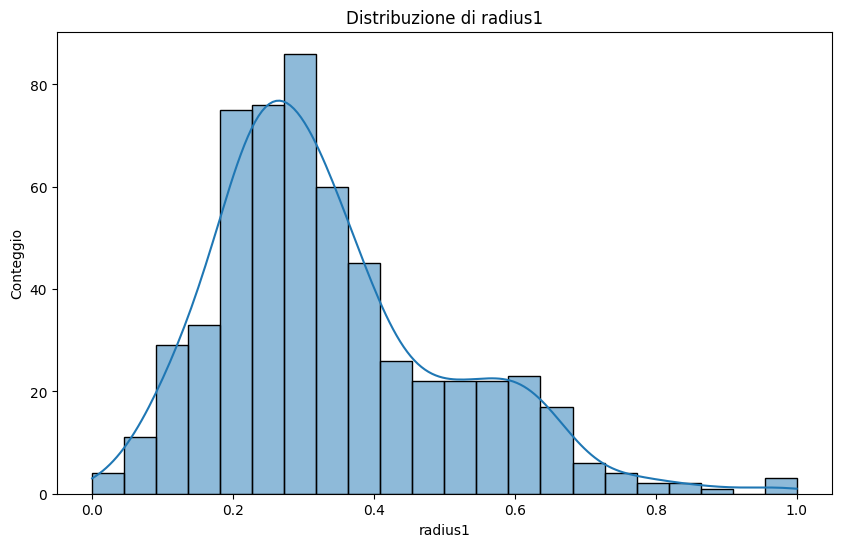

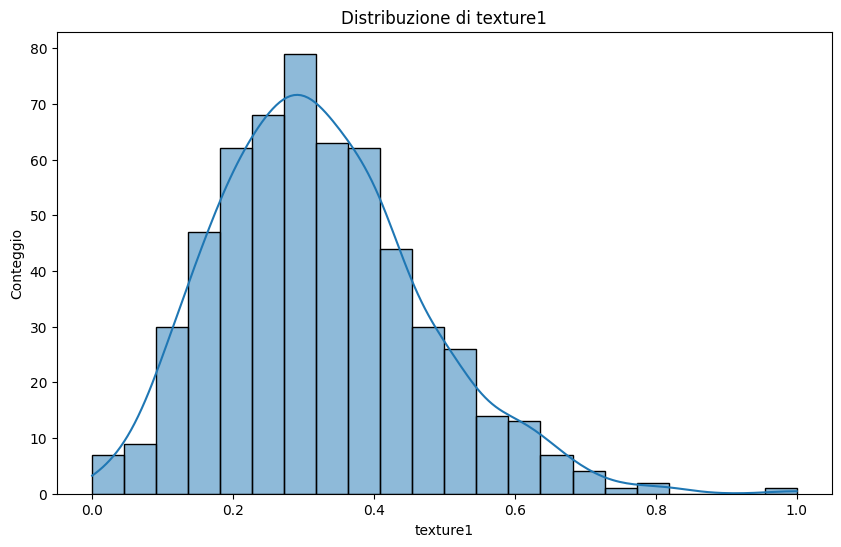

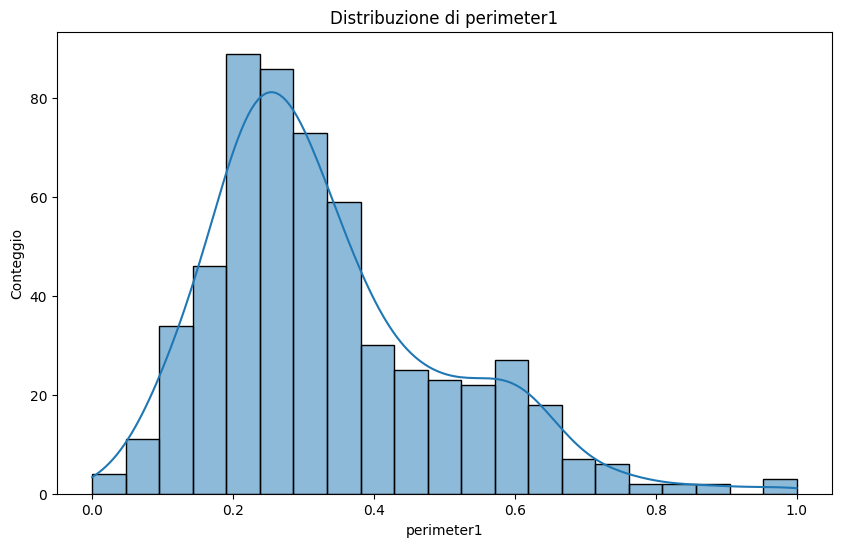

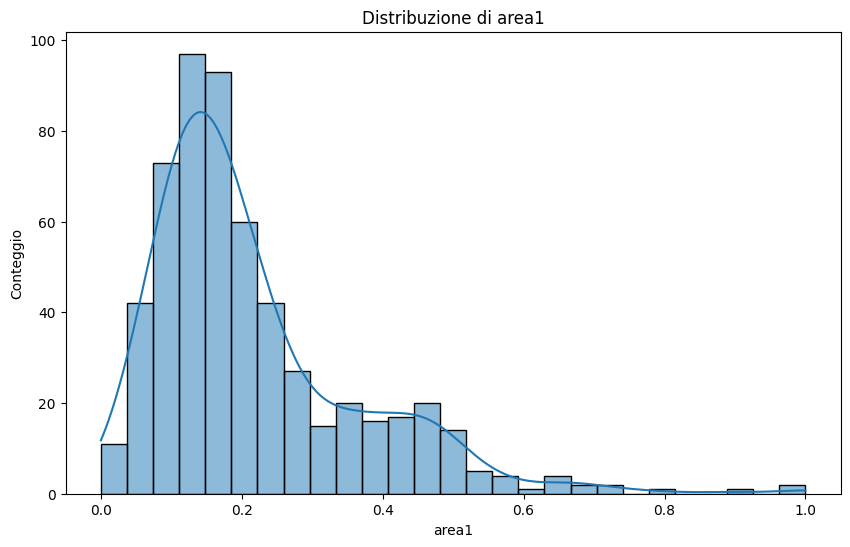

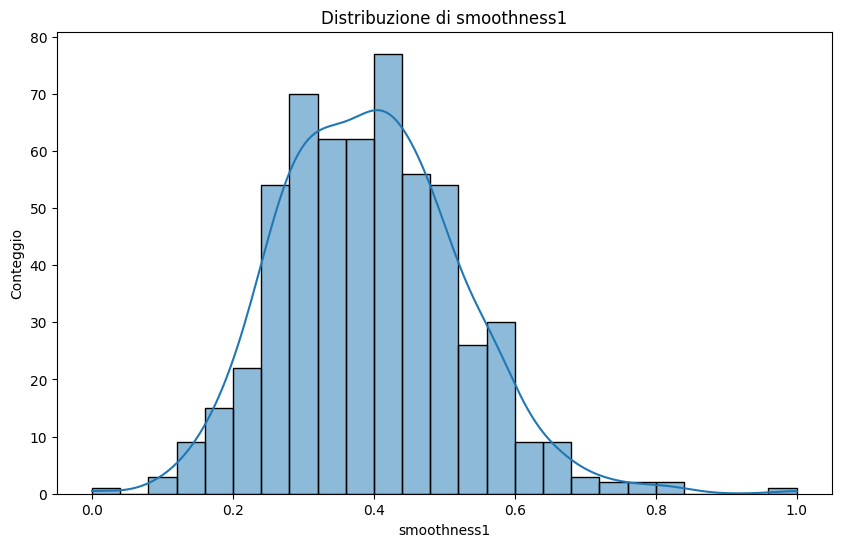

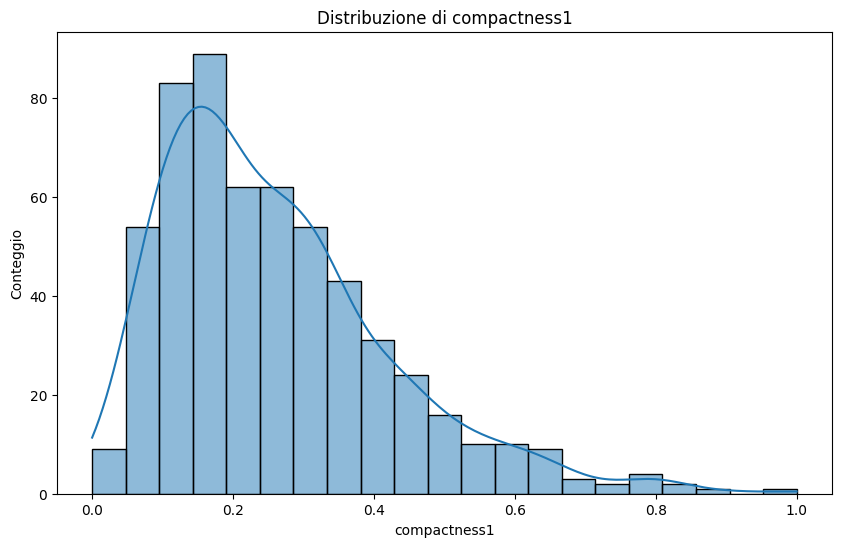

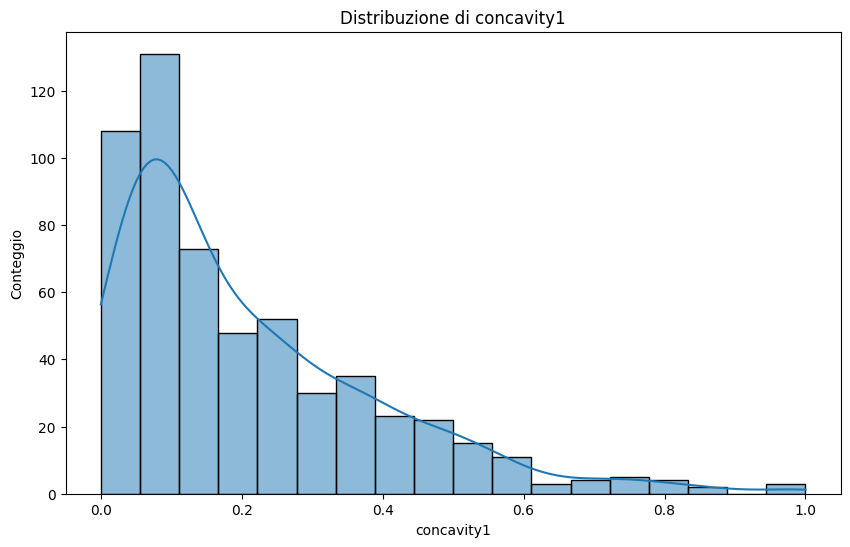

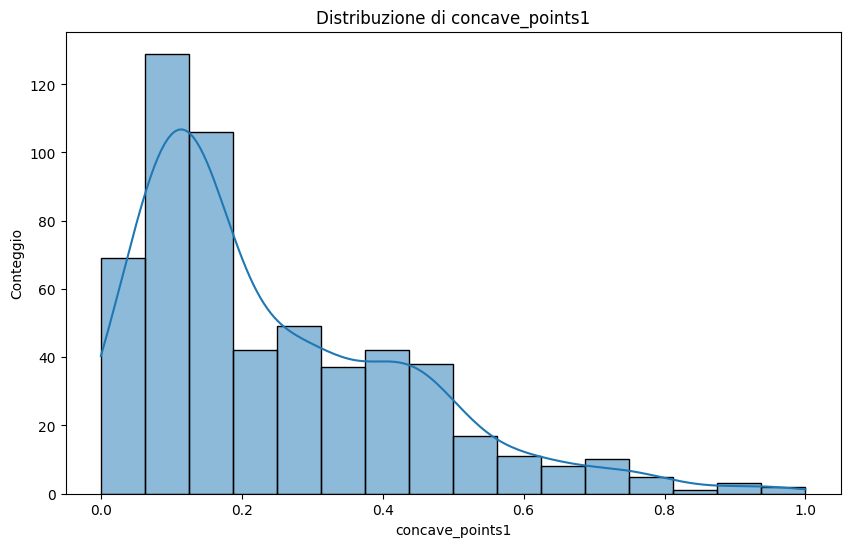

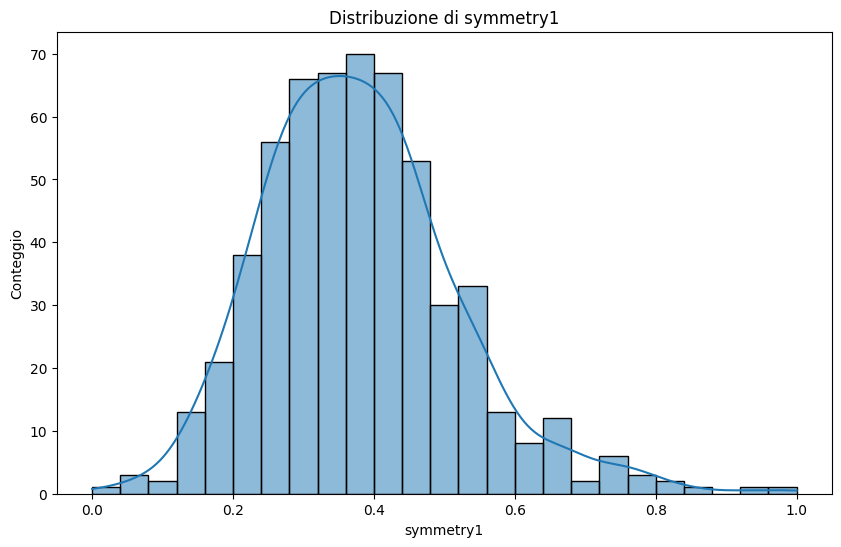

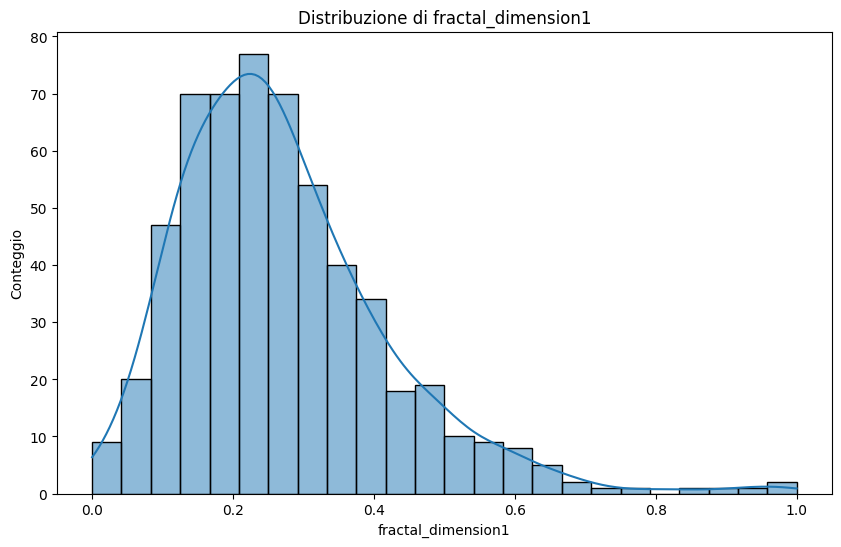

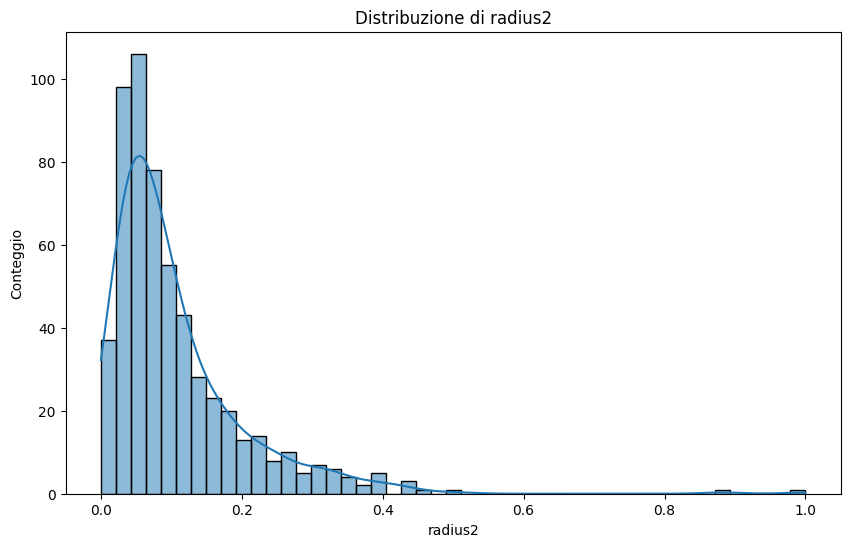

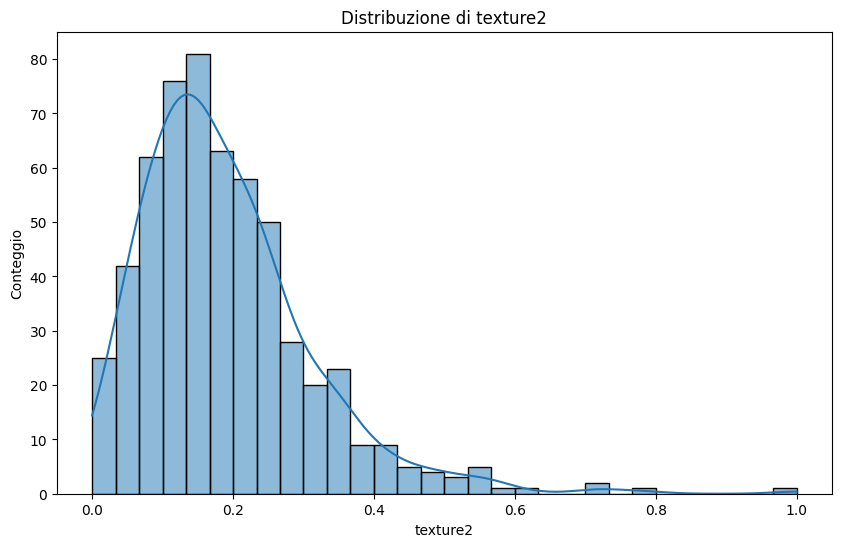

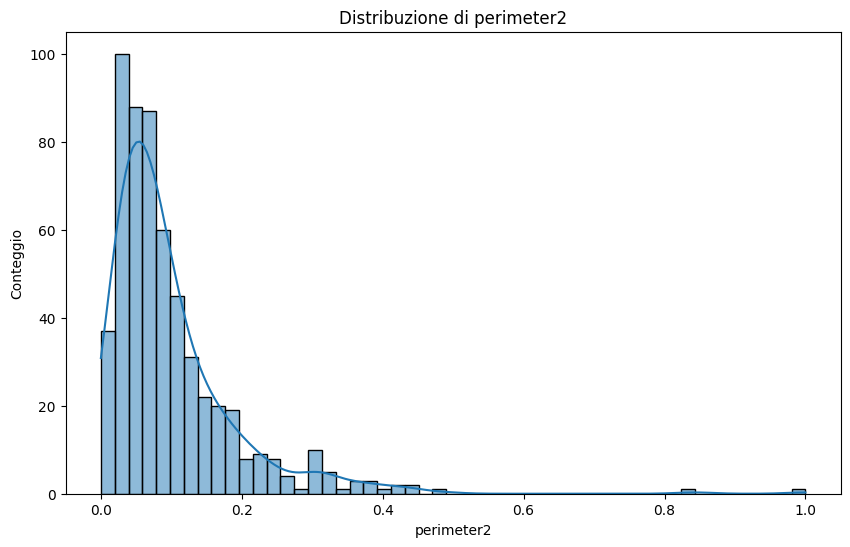

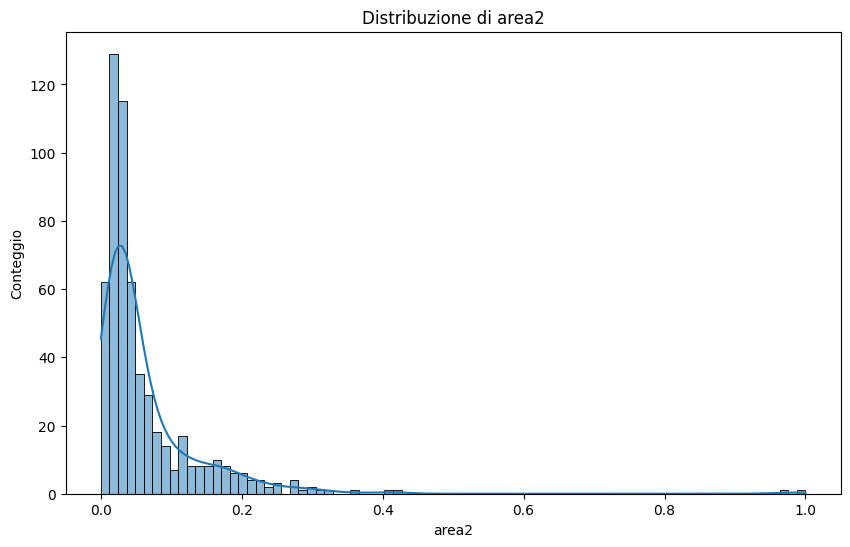

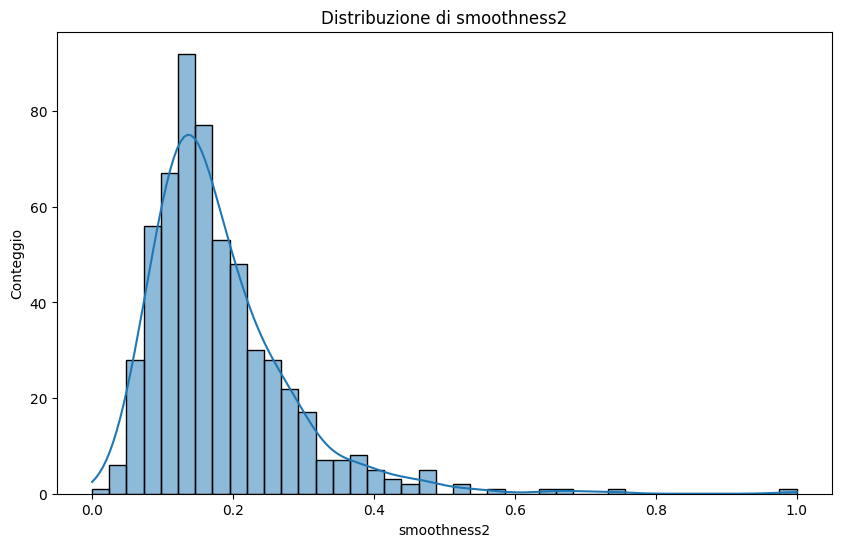

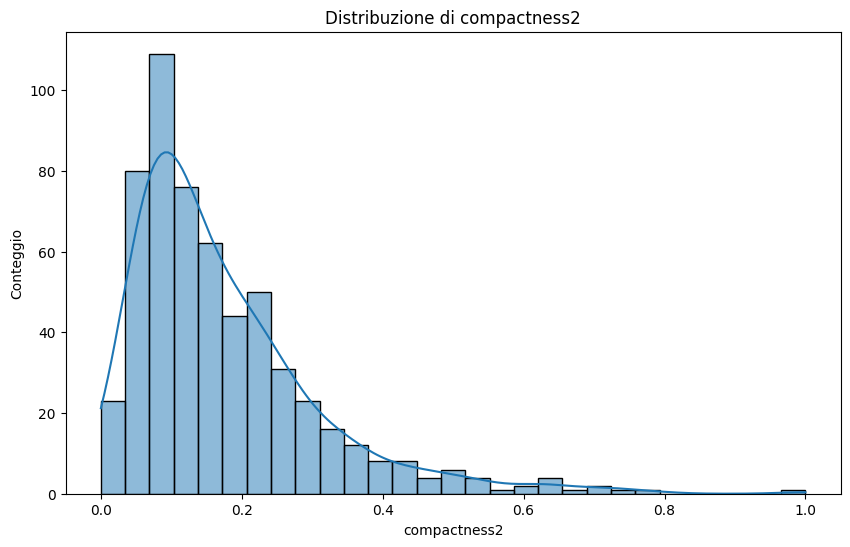

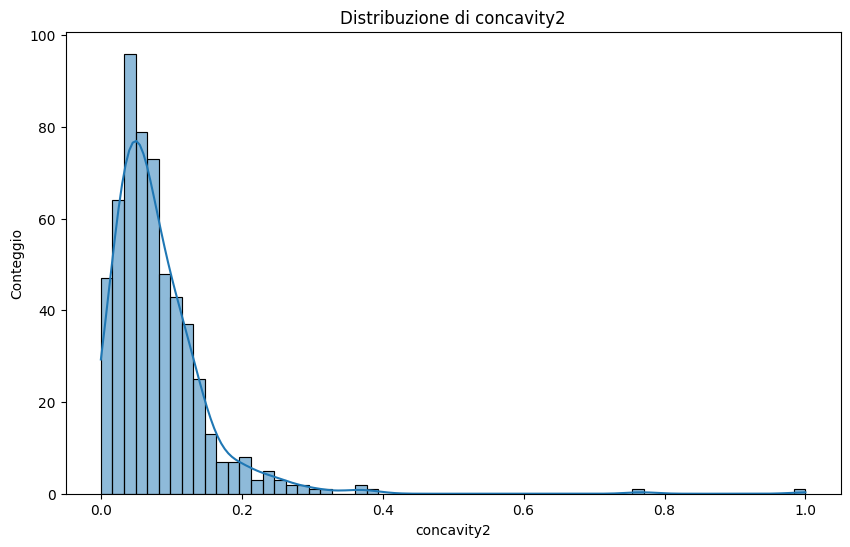

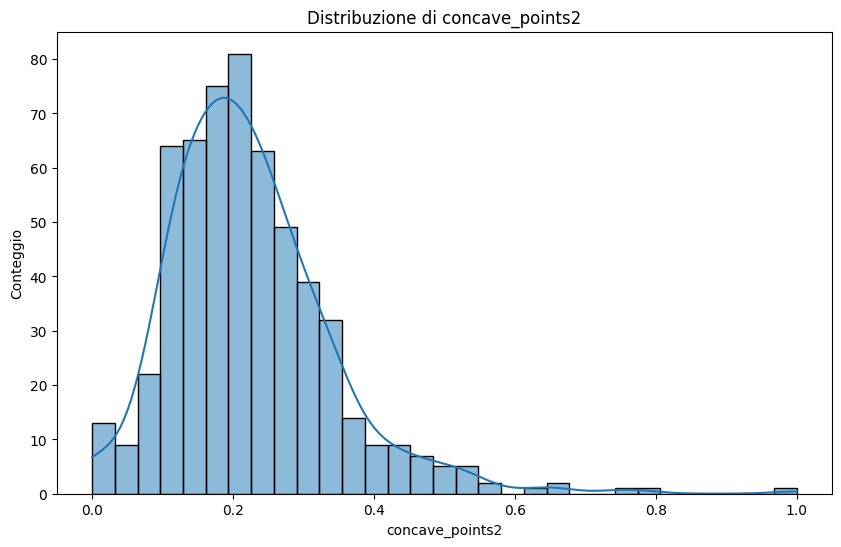

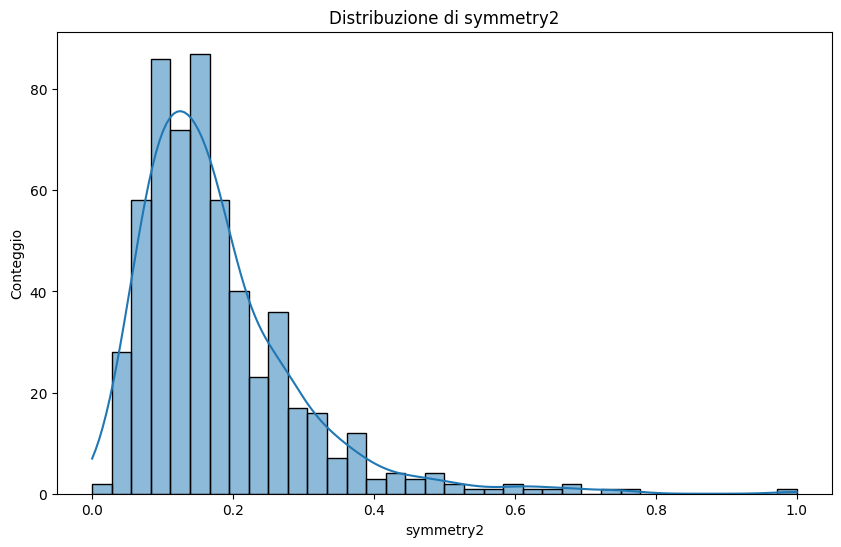

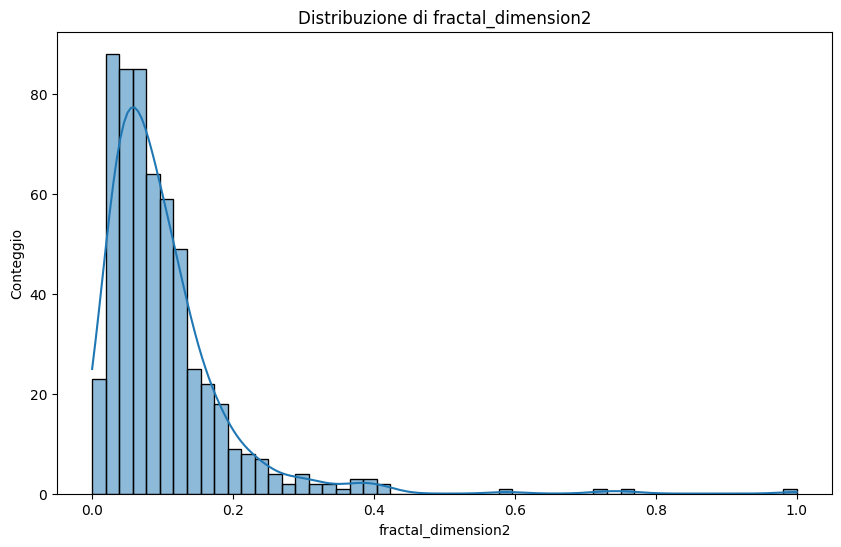

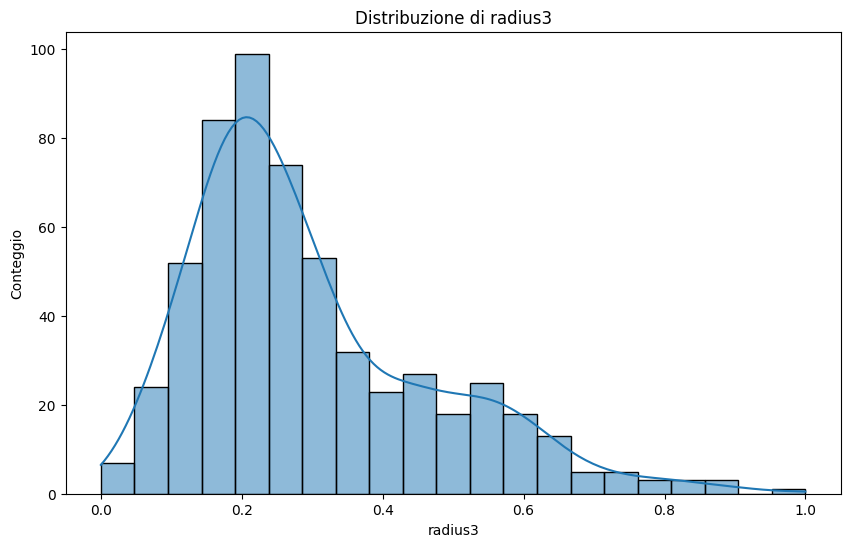

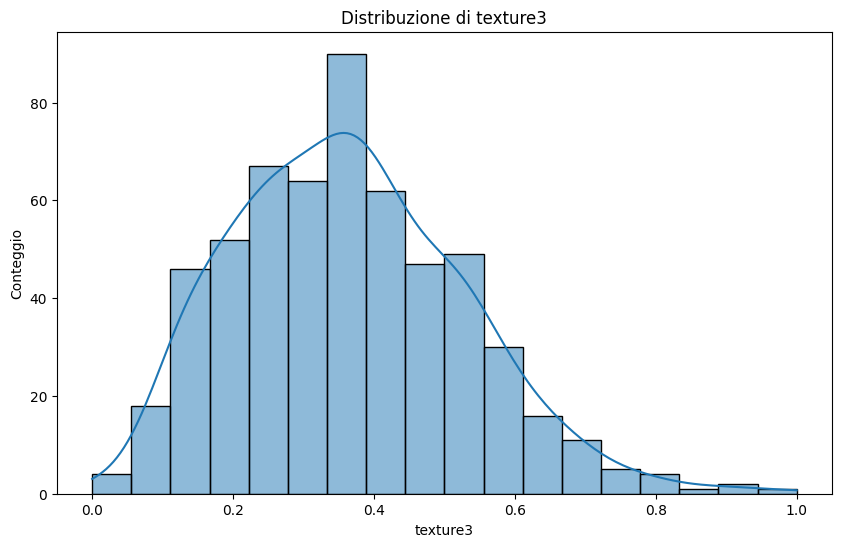

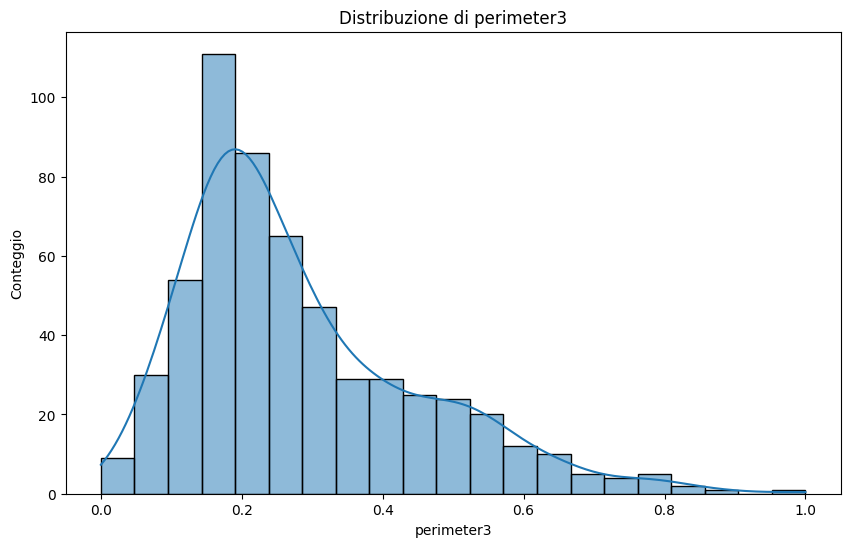

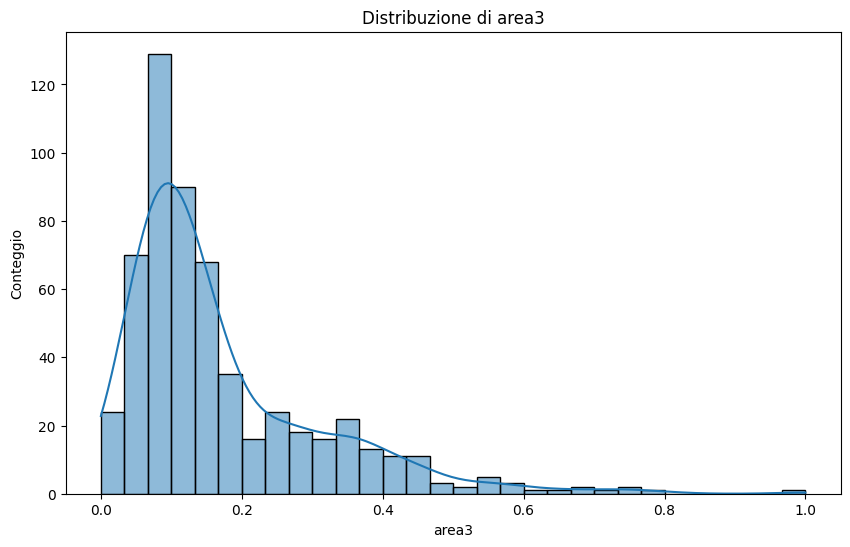

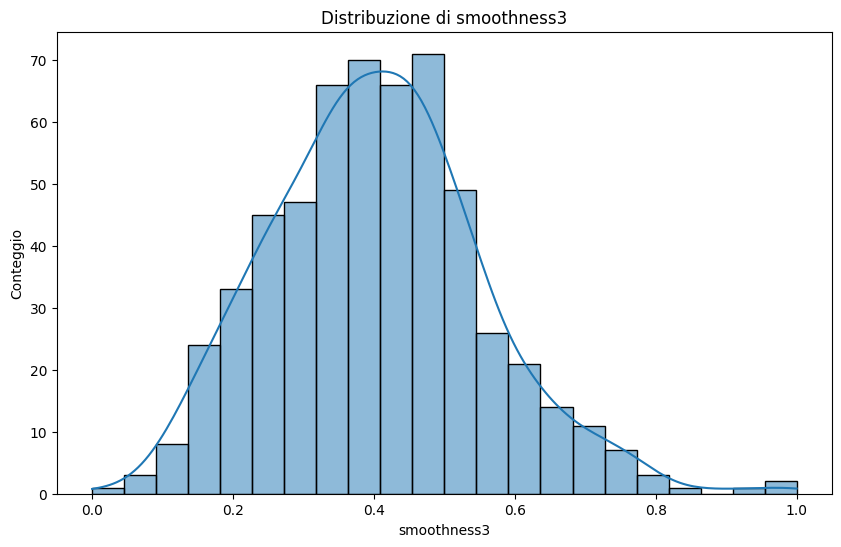

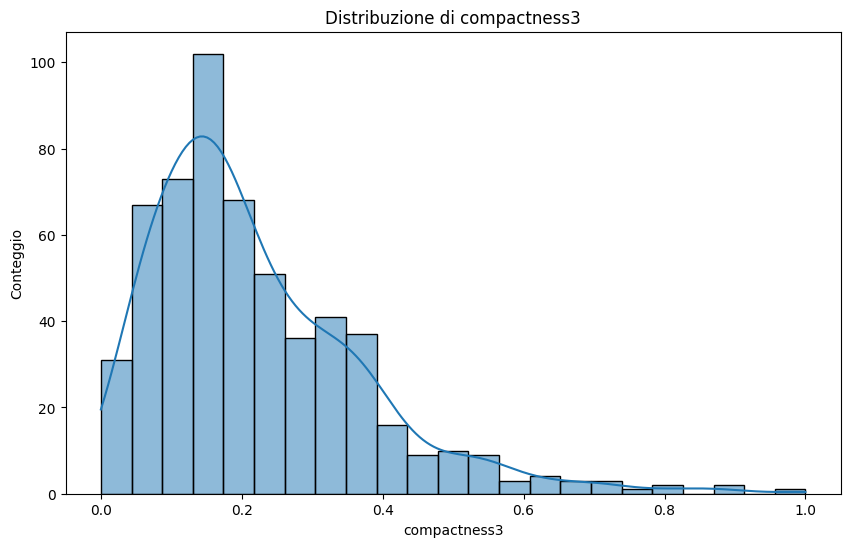

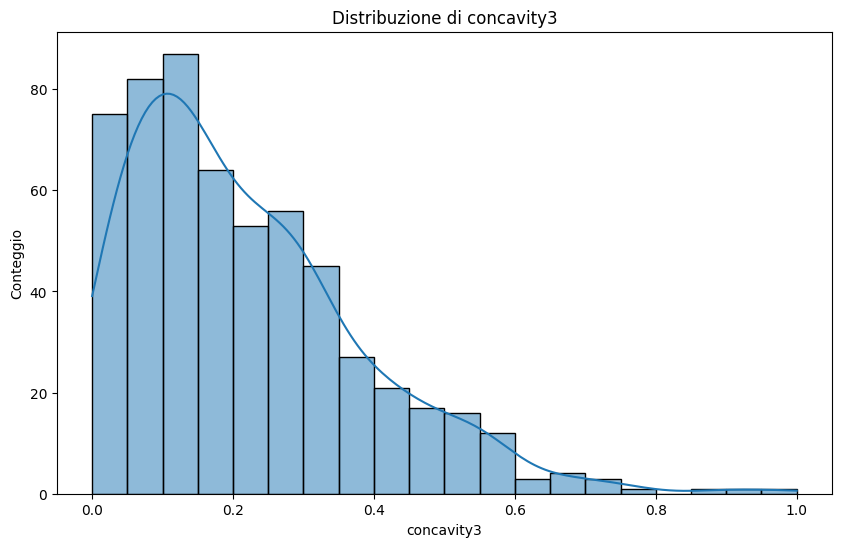

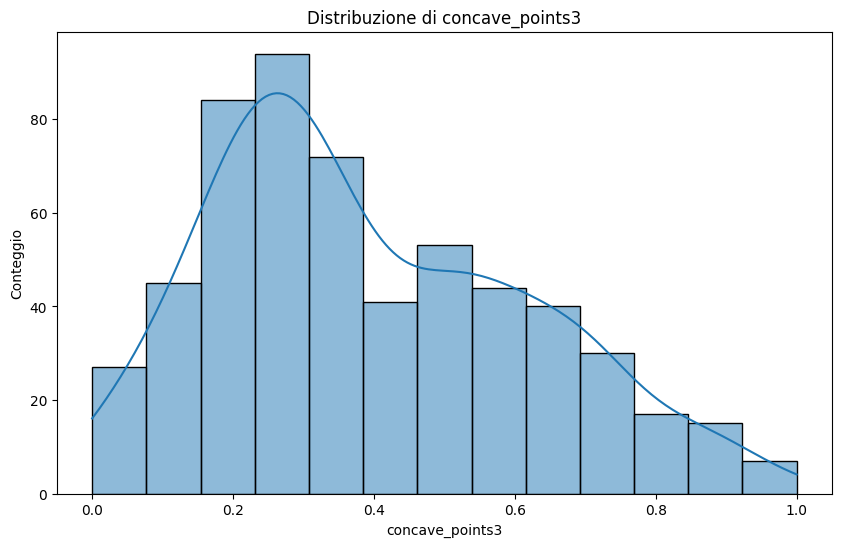

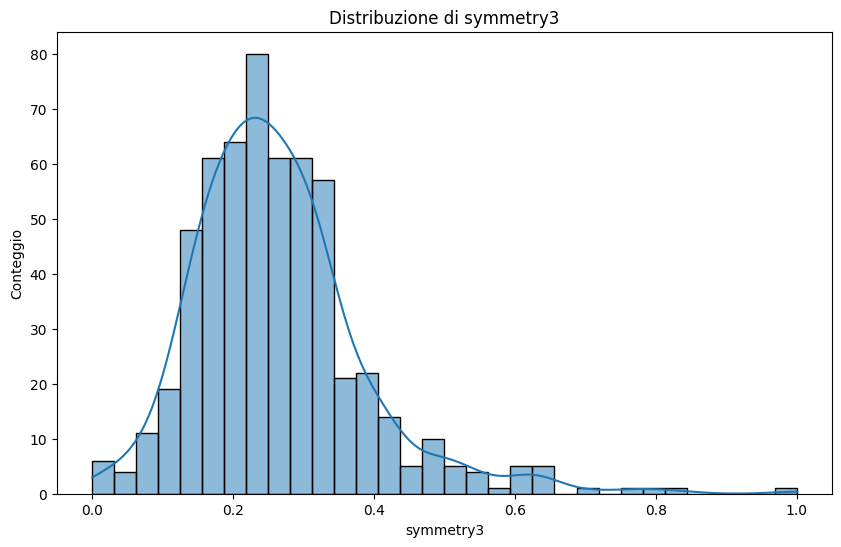

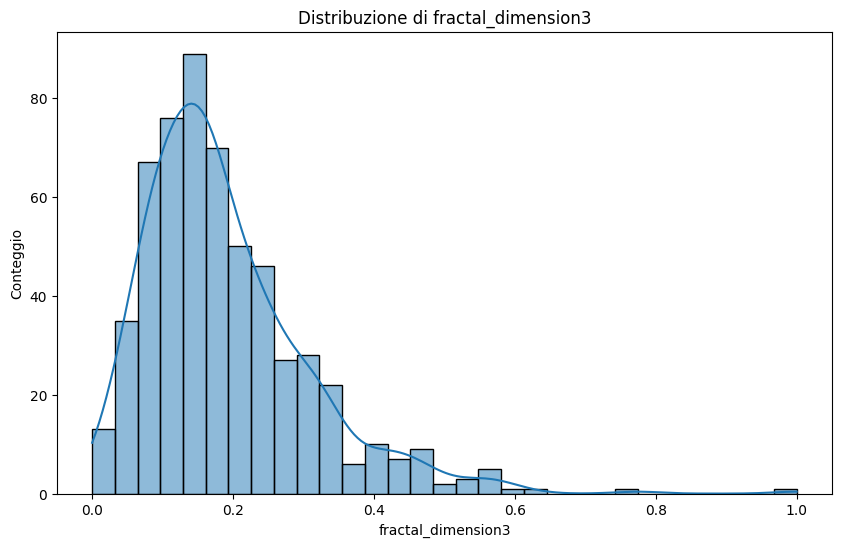


Legenda per l'interpretazione degli indici:
# Skewness = 0: Distribuzione perfettamente simmetrica.
# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).
# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).
# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).
# Kurtosis > 3: Code più pronunciate (leptocurtica).
# Kurtosis < 3: Code meno pronunciate (platicurtica).
# CV < 10%: Distribuzione molto bilanciata.
# CV > 50%: Distribuzione altamente sbilanciata.

Tabella riassuntiva degli indici per le feature numeriche:
                        Gini   Kurtosis  Skewness      CV (%)
area2               0.530831  48.767196  5.432816  135.532746
concavity1          0.471188   1.970592  1.397483   89.696328
radius2             0.440991  17.521162  3.080464   94.346376
perimeter2          0.435422  21.203775  3.434530   95.780956
concave_points1     0.424826   1.046680  1.168090   79.250632
concavity3          0.414828   1.590568  1.147202   76.579608
concavity2    

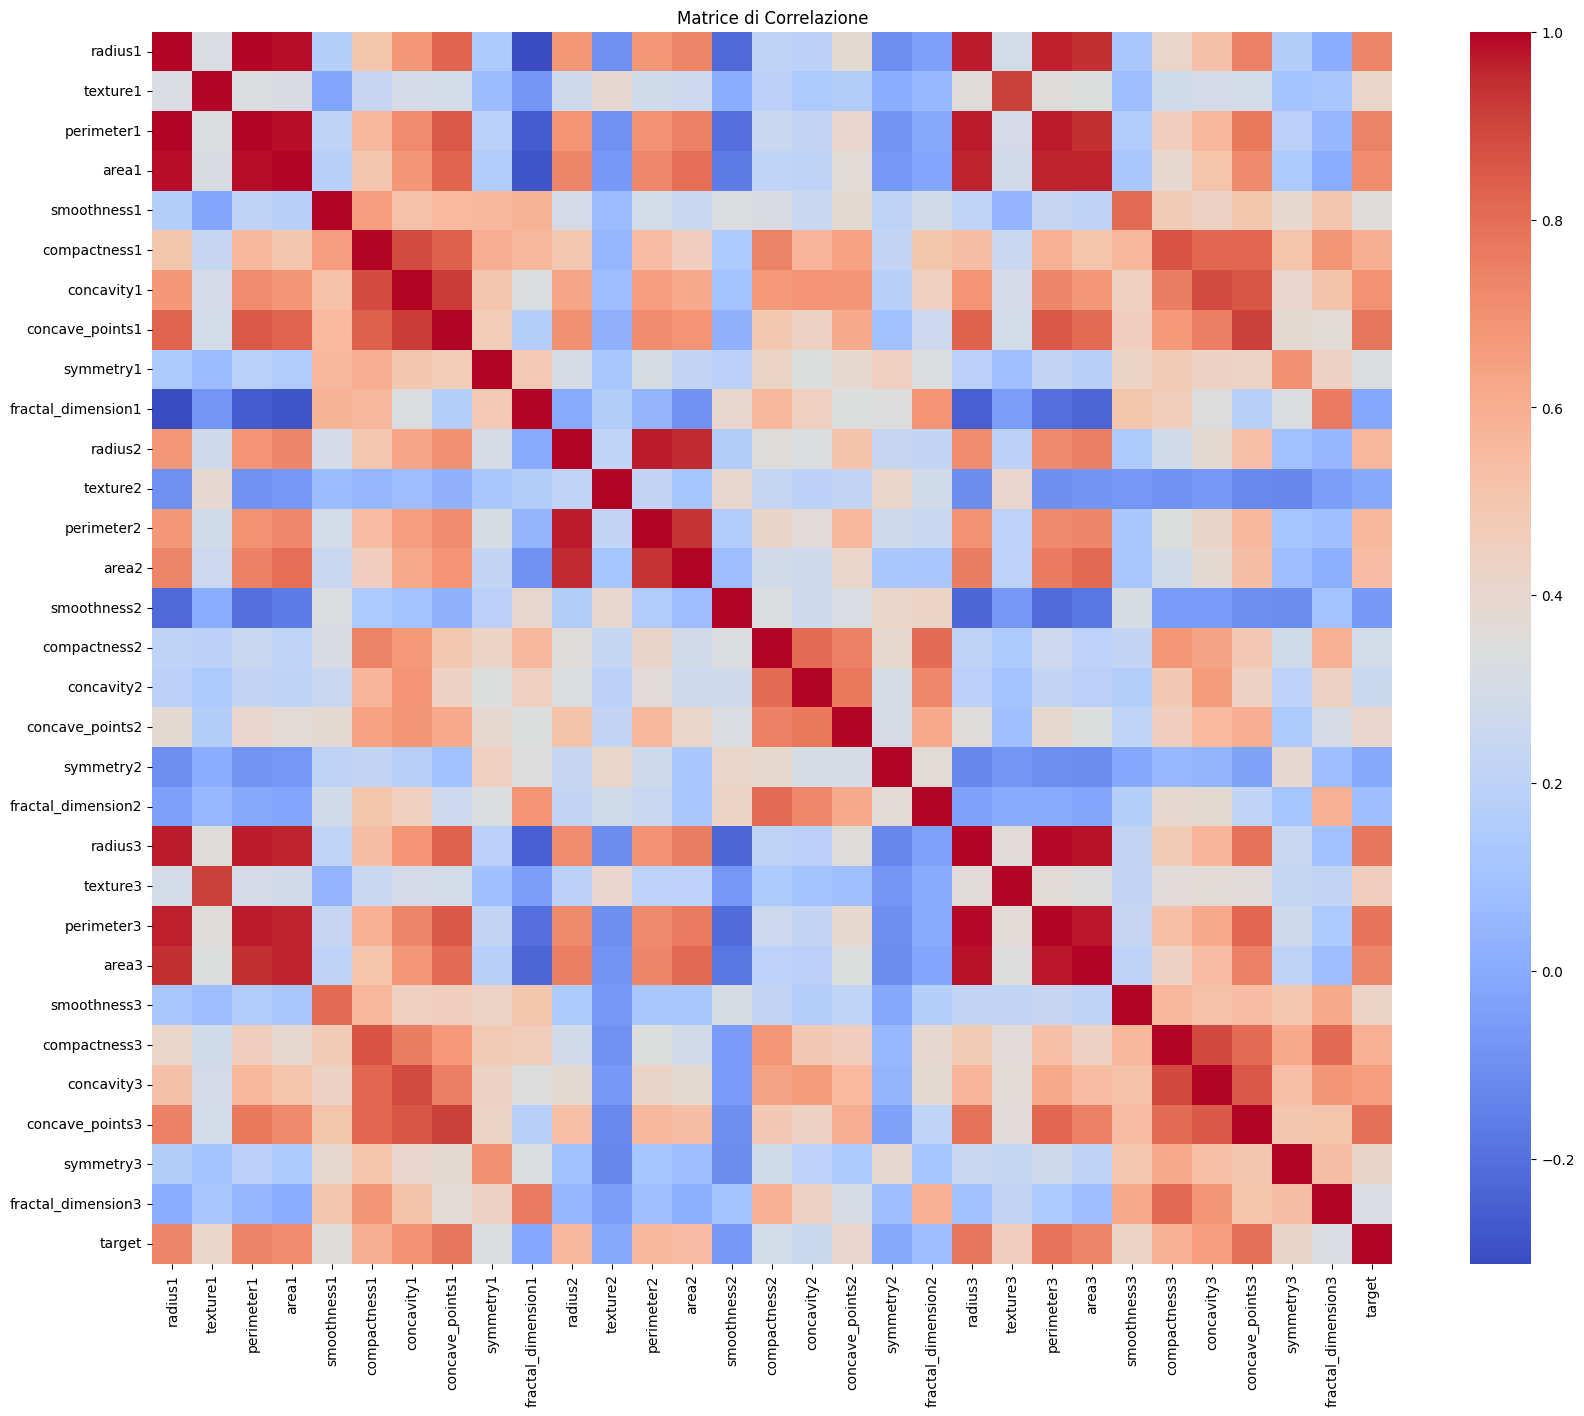

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Funzioni di analisi
def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def calculate_gini(array):
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    n = len(array)
    if np.sum(array) == 0:
        return np.nan  # Evita divisioni per zero
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

def calculate_cv(array):
    mean = np.mean(array)
    if mean == 0:
        return np.nan  # Evita divisioni per zero
    return np.std(array) / mean * 100

df = pd.DataFrame(X, columns=breast_cancer_wisconsin_diagnostic.data.features.columns)
df['target'] = y

# Calcolo degli indici per le variabili numeriche
numerical_columns = df.columns
summary_stats = {}

for col in numerical_columns:
    if col != 'target':  # Escludiamo la colonna target
        data = df[col].dropna().values
        if len(data) > 0:
            summary_stats[col] = {
                'Gini': calculate_gini(data),
                'Kurtosis': kurtosis(data, nan_policy='omit'),
                'Skewness': skew(data, nan_policy='omit'),
                'CV (%)': calculate_cv(data)
            }
            plot_numerical_distribution(df, col)

# Creazione della tabella riassuntiva
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df = summary_df.sort_values('Gini', ascending=False)

# Legenda per l'interpretazione
print("\nLegenda per l'interpretazione degli indici:")
print("# Skewness = 0: Distribuzione perfettamente simmetrica.")
print("# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).")
print("# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).")
print("# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).")
print("# Kurtosis > 3: Code più pronunciate (leptocurtica).")
print("# Kurtosis < 3: Code meno pronunciate (platicurtica).")
print("# CV < 10%: Distribuzione molto bilanciata.")
print("# CV > 50%: Distribuzione altamente sbilanciata.")

print("\nTabella riassuntiva degli indici per le feature numeriche:")
print(summary_df)

# Matrice di correlazione
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()


In [7]:
# Suddivisione del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9, shuffle = True, random_state=123456) #maybe change the train size
X= X_train
y= y_train
print(X)
print(y)

[[0.13067348 0.20155563 0.1223827  ... 0.17728522 0.2515277  0.17519349]
 [0.07648256 0.30064254 0.07117684 ... 0.         0.31086142 0.17132363]
 [0.19683847 0.14744674 0.18968972 ... 0.13477663 0.19929036 0.09930474]
 ...
 [0.30806001 0.42576936 0.29797526 ... 0.44054983 0.25744136 0.09268005]
 [0.54470159 0.26411904 0.53562297 ... 0.57147766 0.18628031 0.25849403]
 [0.36911354 0.48123098 0.37046507 ... 0.55463918 0.34614626 0.22346845]]
[0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 

In [8]:
num_classes = len(np.unique(y))
print(num_classes)

2


In [29]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    num_classes = len(np.unique(y))
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

## Baseline Machine Learning Models: Classifiers with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, log_loss, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
import time

# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precision aggiunto
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification = []

# Random Forest
start_time_rf = time.time()
clf_rf = RandomForestClassifier(n_jobs=-1)
scores_rf = cross_validate(clf_rf, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Accuracy': scores_rf['test_accuracy'].mean(),
    'Recall': scores_rf['test_recall'].mean(),
    'Precision': scores_rf['test_precision'].mean(),
    'F1 Score': scores_rf['test_f1'].mean(),
    'Log Loss': scores_rf['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
clf_svm = SVC(probability=True)
scores_svm = cross_validate(clf_svm, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification.append({
    'Algorithm': 'SVM',
    'Accuracy': scores_svm['test_accuracy'].mean(),
    'Recall': scores_svm['test_recall'].mean(),
    'Precision': scores_svm['test_precision'].mean(),
    'F1 Score': scores_svm['test_f1'].mean(),
    'Log Loss': scores_svm['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
clf_knn = KNeighborsClassifier()
scores_knn = cross_validate(clf_knn, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification.append({
    'Algorithm': 'KNN',
    'Accuracy': scores_knn['test_accuracy'].mean(),
    'Recall': scores_knn['test_recall'].mean(),
    'Precision': scores_knn['test_precision'].mean(),
    'F1 Score': scores_knn['test_f1'].mean(),
    'Log Loss': scores_knn['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
clf_ann = MLPClassifier(max_iter=500)  # Aggiungi eventuali iperparametri se necessario
scores_ann = cross_validate(clf_ann, X, y, cv=3, scoring=scorers)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification.append({
    'Algorithm': 'ANN',
    'Accuracy': scores_ann['test_accuracy'].mean(),
    'Recall': scores_ann['test_recall'].mean(),
    'Precision': scores_ann['test_precision'].mean(),
    'F1 Score': scores_ann['test_f1'].mean(),
    'Log Loss': scores_ann['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione risultati
results_df_3_fold_classification = pd.DataFrame(results_classification)
print("\nResults for Classification Models (3-Fold Cross-Validation):")
print(results_df_3_fold_classification.to_string(index=False))


[CV] END  accuracy: (test=0.942) f1: (test=0.938) log_loss: (test=0.134) precision: (test=0.938) recall: (test=0.938) total time=   0.9s
[CV] END  accuracy: (test=0.947) f1: (test=0.943) log_loss: (test=0.145) precision: (test=0.948) recall: (test=0.939) total time=   0.5s
[CV] END  accuracy: (test=0.971) f1: (test=0.969) log_loss: (test=0.089) precision: (test=0.970) recall: (test=0.967) total time=   0.7s
[CV] END  accuracy: (test=0.971) f1: (test=0.969) log_loss: (test=0.077) precision: (test=0.970) recall: (test=0.967) total time=   0.1s
[CV] END  accuracy: (test=0.947) f1: (test=0.943) log_loss: (test=0.133) precision: (test=0.948) recall: (test=0.939) total time=   0.1s
[CV] END  accuracy: (test=0.976) f1: (test=0.975) log_loss: (test=0.064) precision: (test=0.982) recall: (test=0.969) total time=   0.2s
[CV] END  accuracy: (test=0.977) f1: (test=0.975) log_loss: (test=0.069) precision: (test=0.982) recall: (test=0.969) total time=   0.1s
[CV] END  accuracy: (test=0.947) f1: (tes

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [11]:
#about 11 minutes to run the ANN
results_classification_grid_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50],
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
grid_rf = GridSearchCV(clf_rf, rf_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_grid_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': grid_rf.best_params_,
    'Accuracy': grid_rf.best_score_,
    'Recall': grid_rf.cv_results_['mean_test_recall'][grid_rf.best_index_],
    'Precision': grid_rf.cv_results_['mean_test_precision'][grid_rf.best_index_],  # Aggiunta della precision
    'F1 Score': grid_rf.cv_results_['mean_test_f1'][grid_rf.best_index_],
    'Log Loss': grid_rf.cv_results_['mean_test_log_loss'][grid_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
grid_svm = GridSearchCV(clf_svm, svm_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_grid_search.append({
    'Algorithm': 'SVM',
    'Best Params': grid_svm.best_params_,
    'Accuracy': grid_svm.best_score_,
    'Recall': grid_svm.cv_results_['mean_test_recall'][grid_svm.best_index_],
    'Precision': grid_svm.cv_results_['mean_test_precision'][grid_svm.best_index_],  # Aggiunta della precision
    'F1 Score': grid_svm.cv_results_['mean_test_f1'][grid_svm.best_index_],
    'Log Loss': grid_svm.cv_results_['mean_test_log_loss'][grid_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': [2, 3, 5, 10, 15, 20],
}
clf_knn = KNeighborsClassifier()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_grid_search.append({
    'Algorithm': 'KNN',
    'Best Params': grid_knn.best_params_,
    'Accuracy': grid_knn.best_score_,
    'Recall': grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_],
    'Precision': grid_knn.cv_results_['mean_test_precision'][grid_knn.best_index_],  # Aggiunta della precision
    'F1 Score': grid_knn.cv_results_['mean_test_f1'][grid_knn.best_index_],
    'Log Loss': grid_knn.cv_results_['mean_test_log_loss'][grid_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'batch_size': [16, 32],
    'epochs': [20, 50],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh']
}

clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=16, patience=2, verbose=0)
grid_ann = GridSearchCV(clf_ann, ann_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_grid_search.append({
    'Algorithm': 'ANN',
    'Best Params': grid_ann.best_params_,
    'Accuracy': grid_ann.best_score_,
    'Recall': grid_ann.cv_results_['mean_test_recall'][grid_ann.best_index_],
    'Precision': grid_ann.cv_results_['mean_test_precision'][grid_ann.best_index_],  # Aggiunta della precision
    'F1 Score': grid_ann.cv_results_['mean_test_f1'][grid_ann.best_index_],
    'Log Loss': grid_ann.cv_results_['mean_test_log_loss'][grid_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_grid_search = pd.DataFrame(results_classification_grid_search)

print("Results for Grid Search")
print(results_classification_df_grid_search.to_string(index=False))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7357  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7138 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7049 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7007 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6921 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6787 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6739 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6761 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6735 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6630  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6498  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6529 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6382 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6400 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6237 
E

## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [12]:
results_classification_random_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': sp_randint(10, 100),
    "max_features": sp_randint(1, 64),
    'max_depth': sp_randint(5, 50),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "criterion": ['gini', 'entropy']
}
n_iter_search_rf = 20  # Number of iterations
clf_rf = RandomForestClassifier(random_state=0)
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=n_iter_search_rf, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_random_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': Random_rf.best_params_,
    'Accuracy': Random_rf.best_score_,
    'Recall': Random_rf.cv_results_['mean_test_recall'][Random_rf.best_index_],
    'Precision': Random_rf.cv_results_['mean_test_precision'][Random_rf.best_index_],  # Aggiunta della precision
    'F1 Score': Random_rf.cv_results_['mean_test_f1'][Random_rf.best_index_],
    'Log Loss': Random_rf.cv_results_['mean_test_log_loss'][Random_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': stats.uniform(0, 50),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
n_iter_search_svm = 20
clf_svm = SVC(gamma='scale', probability=True)
Random_svm = RandomizedSearchCV(clf_svm, param_distributions=svm_params, n_iter=n_iter_search_svm, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_random_search.append({
    'Algorithm': 'SVM',
    'Best Params': Random_svm.best_params_,
    'Accuracy': Random_svm.best_score_,
    'Recall': Random_svm.cv_results_['mean_test_recall'][Random_svm.best_index_],
    'Precision': Random_svm.cv_results_['mean_test_precision'][Random_svm.best_index_],  # Aggiunta della precision
    'F1 Score': Random_svm.cv_results_['mean_test_f1'][Random_svm.best_index_],
    'Log Loss': Random_svm.cv_results_['mean_test_log_loss'][Random_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': range(1, 20),
}
n_iter_search_knn = 10
clf_knn = KNeighborsClassifier()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=n_iter_search_knn, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_random_search.append({
    'Algorithm': 'KNN',
    'Best Params': Random_knn.best_params_,
    'Accuracy': Random_knn.best_score_,
    'Recall': Random_knn.cv_results_['mean_test_recall'][Random_knn.best_index_],
    'Precision': Random_knn.cv_results_['mean_test_precision'][Random_knn.best_index_],  # Aggiunta della precision
    'F1 Score': Random_knn.cv_results_['mean_test_f1'][Random_knn.best_index_],
    'Log Loss': Random_knn.cv_results_['mean_test_log_loss'][Random_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': sp_randint(10, 100),
    'epochs': [20, 50],
    'patience': sp_randint(3, 20)
}
n_iter_search_ann = 10
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
Random_ann = RandomizedSearchCV(clf_ann, param_distributions=ann_params, n_iter=n_iter_search_ann, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_random_search.append({
    'Algorithm': 'ANN',
    'Best Params': Random_ann.best_params_,
    'Accuracy': Random_ann.best_score_,
    'Recall': Random_ann.cv_results_['mean_test_recall'][Random_ann.best_index_],
    'Precision': Random_ann.cv_results_['mean_test_precision'][Random_ann.best_index_],  # Aggiunta della precision
    'F1 Score': Random_ann.cv_results_['mean_test_f1'][Random_ann.best_index_],
    'Log Loss': Random_ann.cv_results_['mean_test_log_loss'][Random_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_random_search = pd.DataFrame(results_classification_random_search)

print("Results for Random Search")
print(results_classification_df_random_search.to_string(index=False))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6419  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5957 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5574 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5444 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5214 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5037 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4832 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4555 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4399 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4264 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4178  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4030 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3593 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3590 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3370 
Ep

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7172  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6695 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6309 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6012 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5737 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5491 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5236 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5093 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4753 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4359 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4333  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4005 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3906 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3766 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3593 
Epoch 16/20
1

## HPO Algorithm 3: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

### Using skopt.BayesSearchCV

In [13]:
results_classification_bo = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': Integer(10, 100),
    "max_features": Integer(1, 64),
    'max_depth': Integer(5, 50),
    "min_samples_split": Integer(2, 11),
    "min_samples_leaf": Integer(1, 11),
    "criterion": ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
with parallel_backend('threading'):
    Bayes_rf = BayesSearchCV(clf_rf, rf_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_bo.append({
    'Algorithm': 'Random Forest',
    'Best Params': Bayes_rf.best_params_,
    'Accuracy': Bayes_rf.best_score_,
    'Recall': Bayes_rf.cv_results_['mean_test_recall'][Bayes_rf.best_index_],
    'Precision': Bayes_rf.cv_results_['mean_test_precision'][Bayes_rf.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_rf.cv_results_['mean_test_f1'][Bayes_rf.best_index_],
    'Log Loss': Bayes_rf.cv_results_['mean_test_log_loss'][Bayes_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': Real(0.01, 50),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
with parallel_backend('threading'):
    Bayes_svm = BayesSearchCV(clf_svm, svm_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_bo.append({
    'Algorithm': 'SVM',
    'Best Params': Bayes_svm.best_params_,
    'Accuracy': Bayes_svm.best_score_,
    'Recall': Bayes_svm.cv_results_['mean_test_recall'][Bayes_svm.best_index_],
    'Precision': Bayes_svm.cv_results_['mean_test_precision'][Bayes_svm.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_svm.cv_results_['mean_test_f1'][Bayes_svm.best_index_],
    'Log Loss': Bayes_svm.cv_results_['mean_test_log_loss'][Bayes_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': Integer(1, 20),
}
clf_knn = KNeighborsClassifier()
with parallel_backend('threading'):
    Bayes_knn = BayesSearchCV(clf_knn, knn_params, cv=3, n_iter=10, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_bo.append({
    'Algorithm': 'KNN',
    'Best Params': Bayes_knn.best_params_,
    'Accuracy': Bayes_knn.best_score_,
    'Recall': Bayes_knn.cv_results_['mean_test_recall'][Bayes_knn.best_index_],
    'Precision': Bayes_knn.cv_results_['mean_test_precision'][Bayes_knn.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_knn.cv_results_['mean_test_f1'][Bayes_knn.best_index_],
    'Log Loss': Bayes_knn.cv_results_['mean_test_log_loss'][Bayes_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': Integer(10, 100),
    'epochs': Categorical([20, 50]),
    'patience': Integer(3, 20)
}
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
with parallel_backend('threading'):
    Bayes_ann = BayesSearchCV(clf_ann, ann_params, cv=3, n_iter=10, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_bo.append({
    'Algorithm': 'ANN',
    'Best Params': Bayes_ann.best_params_,
    'Accuracy': Bayes_ann.best_score_,
    'Recall': Bayes_ann.cv_results_['mean_test_recall'][Bayes_ann.best_index_],
    'Precision': Bayes_ann.cv_results_['mean_test_precision'][Bayes_ann.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_ann.cv_results_['mean_test_f1'][Bayes_ann.best_index_],
    'Log Loss': Bayes_ann.cv_results_['mean_test_log_loss'][Bayes_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_bo = pd.DataFrame(results_classification_bo)

print("Results for Bayesian Optimization")
print(results_classification_df_bo.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [47.29530850922015, 'linear']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [20.561757584487363, 'sigmoid']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [37.11748806330989, 'linear']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [11.35495634503

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6913  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6597  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6387  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6125  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5793  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5569  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5372 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5122  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4918  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4729 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4585 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4587  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4185  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4068  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6770  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6655 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6533 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6393 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6264 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6043 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5913 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5822 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5750 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5469 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5447 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5278 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5029 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4968  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4761 
Ep

### Using skopt.gp_minimize

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from skopt import gp_minimize
from skopt.space import Integer, Real, Categorical
from joblib import parallel_backend

results_classification_skopt_gp_minimize = []

def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='accuracy').mean()
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='recall'))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='f1'))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='precision'))
    log_loss_val = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='neg_log_loss'))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0, epsilon=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + epsilon * precision + gamma * f1 + delta * log_loss_val)

# Random Forest
start_time_rf = time.time()
reg_rf = RandomForestClassifier()

space_rf = [
    Integer(10, 100, name='n_estimators'),
    Integer(5, 50, name='max_depth'),
    Integer(1, 64, name='max_features'),
    Integer(2, 11, name='min_samples_split'),
    Integer(1, 11, name='min_samples_leaf'),
    Categorical(['gini', 'entropy'], name='criterion'),
]

@use_named_args(space_rf)
def objective_rf(**params):
    reg_rf.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_rf, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_rf = gp_minimize(objective_rf, space_rf, n_calls=20, random_state=0)

elapsed_time_rf = time.time() - start_time_rf
# Rebuild the model with the best parameters
best_rf = RandomForestClassifier(**dict(zip([dim.name for dim in space_rf], res_gp_rf.x)))
best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'Random Forest',
    'Best Params': dict(zip([dim.name for dim in space_rf], res_gp_rf.x)),
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
reg_svm = SVC(gamma='scale', probability=True)

space_svm = [
    Real(0.01, 50, name='C'),
    Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'),
]

@use_named_args(space_svm)
def objective_svm(**params):
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_svm = gp_minimize(objective_svm, space_svm, n_calls=20, random_state=0)

elapsed_time_svm = time.time() - start_time_svm
# Rebuild the model with the best parameters
best_svm = SVC(**dict(zip([dim.name for dim in space_svm], res_gp_svm.x)), probability=True)
best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'SVM',
    'Best Params': dict(zip([dim.name for dim in space_svm], res_gp_svm.x)),
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
reg_knn = KNeighborsClassifier()

space_knn = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space_knn)
def objective_knn(**params):
    reg_knn.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_knn, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_knn = gp_minimize(objective_knn, space_knn, n_calls=10, random_state=0)

elapsed_time_knn = time.time() - start_time_knn
# Rebuild the model with the best parameters
best_knn = KNeighborsClassifier(**dict(zip([dim.name for dim in space_knn], res_gp_knn.x)))
best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'KNN',
    'Best Params': dict(zip([dim.name for dim in space_knn], res_gp_knn.x)),
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
space_ann = [
    Categorical(['lbfgs', 'adam', 'sgd'], name='optimizer'),
    Categorical(['relu', 'tanh'], name='activation'),
    Integer(10, 100, name='neurons'),
    Integer(3, 20, name='patience'),
    Integer(16, 64, name='batch_size'),
    Categorical([20, 50], name='epochs'),
]

@use_named_args(space_ann)
def objective_ann(optimizer, activation, neurons, patience, batch_size, epochs):
    model = MLPClassifier(
        hidden_layer_sizes=(neurons,),
        activation=activation,
        solver=optimizer,
        batch_size=batch_size,
        max_iter=epochs,
        early_stopping=True,
        n_iter_no_change=patience,
        random_state=42
    )
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(model, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_ann = gp_minimize(objective_ann, space_ann, n_calls=20, random_state=42, verbose=0)

elapsed_time_ann = time.time() - start_time_ann
# Rebuild the model with the best parameters
best_ann = MLPClassifier(
    hidden_layer_sizes=(res_gp_ann.x[2],),
    activation=res_gp_ann.x[1],
    solver=res_gp_ann.x[0],
    batch_size=res_gp_ann.x[4],
    max_iter=res_gp_ann.x[5],
    early_stopping=True,
    n_iter_no_change=res_gp_ann.x[3],
    random_state=42
)
best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'ANN',
    'Best Params': dict(zip([dim.name for dim in space_ann], res_gp_ann.x)),
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_skopt_gp_minimize = pd.DataFrame(results_classification_skopt_gp_minimize)
print("Results for skopt.gp_minimize")
print(results_classification_df_skopt_gp_minimize.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [39.12826248692367, 'rbf']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'linear'] before, using random point [12.671579506200485, 'sigmoid']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skop

Results for skopt.gp_minimize
    Algorithm                                                                                                                   Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 47, 'max_depth': 14, 'max_features': 64, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}  0.945350 0.916667   0.931184  0.921693  0.195295         69.190443
          SVM                                                                                   {'C': 13.640088166059861, 'kernel': 'poly'}  0.960991 0.937500   0.957966  0.947453  0.162898         11.916140
          KNN                                                                                                            {'n_neighbors': 2}  0.945304 0.859375   0.994444  0.921140  0.752590          1.675441
          ANN                   {'optimizer': 'lbfgs', 'activation': 'relu', 'neurons': 32, 'patience': 15, 'batch_size': 45, 'epochs': 50

## HPO Algorithm 4: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [20]:
results_classification_bo_tpe = []

def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='accuracy').mean()
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='recall'))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='precision'))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='f1'))
    log_loss_val = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='neg_log_loss'))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0, epsilon=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + epsilon * precision + gamma * f1 + delta * log_loss_val)

# Objective function for Random Forest
def objective_rf(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': str(params['criterion'])
    }
    clf = RandomForestClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

# Define search space for Random Forest
space_rf = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    'max_features': hp.quniform('max_features', 1, 64, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

start_time = time.time()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=20)
elapsed_time_rf = round(time.time() - start_time, 2)

best_params_rf = space_eval(space_rf, best_rf)
best_rf_model = RandomForestClassifier(
    n_estimators=int(best_params_rf['n_estimators']),
    max_depth=int(best_params_rf['max_depth']),
    max_features=int(best_params_rf['max_features']),
    min_samples_split=int(best_params_rf['min_samples_split']),
    min_samples_leaf=int(best_params_rf['min_samples_leaf']),
    criterion=str(best_params_rf['criterion'])
)

best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# Objective function for SVM
def objective_svm(params):
    params = {
        'C': params['C'],
        'kernel': str(params['kernel'])
    }
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

space_svm = {
    'C': hp.uniform('C', 0.01, 50),
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
}

start_time_svm = time.time()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=20)
elapsed_time_svm = round(time.time() - start_time_svm, 2)

best_params_svm = space_eval(space_svm, best_svm)
best_svm_model = SVC(**best_params_svm, gamma='scale', probability=True)
best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# Objective function for KNN
def objective_knn(params):
    params = {
        'n_neighbors': int(params['n_neighbors'])
    }
    clf = KNeighborsClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

space_knn = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1)
}

start_time = time.time()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=20)
elapsed_time_knn = round(time.time() - start_time, 2)

best_params_knn = space_eval(space_knn, best_knn)
best_knn_model = KNeighborsClassifier(
    n_neighbors=int(best_params_knn['n_neighbors'])
)

best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# Objective function for ANN
def objective_ann(params):
    clf = KerasClassifier(build_fn=ANN,
                          optimizer=str(params['optimizer']),
                          activation=str(params['activation']),
                          loss=str(params['loss']),
                          batch_size=int(params['batch_size']),
                          epochs=int(params['epochs']),
                          verbose=0)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

space_ann = {
    "optimizer": hp.choice('optimizer', ['adam', 'rmsprop']),
    "activation": hp.choice('activation', ['relu', 'tanh']),
    "loss": hp.choice('loss', ['sparse_categorical_crossentropy']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

start_time = time.time()
best_ann = fmin(fn=objective_ann, space=space_ann, algo=tpe.suggest, max_evals=10)
elapsed_time_ann = round(time.time() - start_time, 2)

best_params_ann = space_eval(space_ann, best_ann)
best_ann_model = KerasClassifier(build_fn=ANN,
                                 optimizer=str(best_params_ann['optimizer']),
                                 activation=str(best_params_ann['activation']),
                                 loss=str(best_params_ann['loss']),
                                 batch_size=int(best_params_ann['batch_size']),
                                 epochs=int(best_params_ann['epochs']),
                                 verbose=0)

best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti l'array in un DataFrame
results_classification_df_bo_tpe = pd.DataFrame(results_classification_bo_tpe)
print("Results for Bayesian Optimization with TPE")
print(results_classification_df_bo_tpe.to_string(index=False))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



100%|██████████| 10/10 [08:12<00:00, 49.26s/trial, best loss: -3.981227182233916]
Results for Bayesian Optimization with TPE
    Algorithm                                                                                                                                                   Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                      {'criterion': 'gini', 'max_depth': 39.0, 'max_features': 52.0, 'min_samples_leaf': 6.0, 'min_samples_split': 10.0, 'n_estimators': 13.0}  0.931682 0.890625   0.936975  0.913994  0.257292             72.40
          SVM                                                                                                                   {'C': 11.063051005385857, 'kernel': 'poly'}  0.960991 0.937500   0.958586  0.947563  0.170785              8.31
          KNN                                                                                                                                          {'n_

## HPO Algorithm 5: PSO
Partical swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.

In [24]:
results_classification_pso = []
data = X
labels = y.tolist()

# Define scorers with precision added
scorers = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'log_loss': make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')
}

# Random Forest
search_rf = {
    'n_estimators': [10, 100],
    'max_features': [1, 64],
    'max_depth': [5, 50],
    "min_samples_split": [2, 11],
    "min_samples_leaf": [1, 11],
    "criterion": [0, 1]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_rf(x_train, y_train, x_test, y_test, n_estimators=None, max_features=None, max_depth=None, min_samples_split=None, min_samples_leaf=None, criterion=None):
    cri = 'gini' if criterion < 0.5 else 'entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_rf = time.time()
optimal_configuration_rf, info_rf, _ = optunity.maximize(performance_rf, solver_name='particle swarm', num_evals=20, **search_rf)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
accuracy_rf = info_rf.optimum

# Get all metrics for RF
cri = 'gini' if optimal_configuration_rf['criterion'] < 0.5 else 'entropy'
rf_model = RandomForestClassifier(n_estimators=int(optimal_configuration_rf['n_estimators']),
                                  max_features=int(optimal_configuration_rf['max_features']),
                                  max_depth=int(optimal_configuration_rf['max_depth']),
                                  min_samples_split=int(optimal_configuration_rf['min_samples_split']),
                                  min_samples_leaf=int(optimal_configuration_rf['min_samples_leaf']),
                                  criterion=cri)
rf_scores = cross_validate(rf_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'Random Forest',
    'Best Params': optimal_configuration_rf,
    'Accuracy': np.mean(rf_scores['test_accuracy']),
    'Recall': np.mean(rf_scores['test_recall']),
    'Precision': np.mean(rf_scores['test_precision']),
    'F1 Score': np.mean(rf_scores['test_f1']),
    'Log Loss': np.mean(rf_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
search_svm = {
    'C': (0, 50),
    'kernel': [0, 4]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_svm(x_train, y_train, x_test, y_test, C=None, kernel=None):
    ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(kernel)]
    model = SVC(C=float(C), kernel=ke, probability=True)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_svm = time.time()
optimal_configuration_svm, info_svm, _ = optunity.maximize(performance_svm, solver_name='particle swarm', num_evals=20, **search_svm)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
accuracy_svm = info_svm.optimum

# Get all metrics for SVM
ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(optimal_configuration_svm['kernel'])]
svm_model = SVC(C=float(optimal_configuration_svm['C']), kernel=ke, probability=True)
svm_scores = cross_validate(svm_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'SVM',
    'Best Params': optimal_configuration_svm,
    'Accuracy': np.mean(svm_scores['test_accuracy']),
    'Recall': np.mean(svm_scores['test_recall']),
    'Precision': np.mean(svm_scores['test_precision']),
    'F1 Score': np.mean(svm_scores['test_f1']),
    'Log Loss': np.mean(svm_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
search_knn = {
    'n_neighbors': [1, 20],
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_knn(x_train, y_train, x_test, y_test, n_neighbors=None):
    model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_knn = time.time()
optimal_configuration_knn, info_knn, _ = optunity.maximize(performance_knn, solver_name='particle swarm', num_evals=10, **search_knn)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
accuracy_knn = info_knn.optimum

# Get all metrics for KNN
knn_model = KNeighborsClassifier(n_neighbors=int(optimal_configuration_knn['n_neighbors']))
knn_scores = cross_validate(knn_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'KNN',
    'Best Params': optimal_configuration_knn,
    'Accuracy': np.mean(knn_scores['test_accuracy']),
    'Recall': np.mean(knn_scores['test_recall']),
    'Precision': np.mean(knn_scores['test_precision']),
    'F1 Score': np.mean(knn_scores['test_f1']),
    'Log Loss': np.mean(knn_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
search_ann = {
    'optimizer': [0, 3],
    'activation': [0, 2],
    'batch_size': [0, 2],
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_ann(x_train, y_train, x_test, y_test, optimizer=None, activation=None, batch_size=None, neurons=None, epochs=None, patience=None):
    if optimizer < 1:
        op = 'adam'
    elif optimizer < 2:
        op = 'sgd'
    else:
        op = 'lbfgs'
    if activation < 1:
        ac = 'relu'
    else:
        ac = 'tanh'
    if batch_size < 1:
        ba = 16
    else:
        ba = 32
    model = ANN(optimizer=op, activation=ac, batch_size=ba, neurons=int(neurons), epochs=int(epochs), patience=int(patience))
    scores = cross_validate(model, X, y, cv=3, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_ann = time.time()
optimal_configuration_ann, info_ann, _ = optunity.maximize(performance_ann, solver_name='particle swarm', num_evals=20, **search_ann)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
accuracy_ann = info_ann.optimum

# Get all metrics for ANN
if optimal_configuration_ann['optimizer'] < 1:
    op = 'adam'
elif optimal_configuration_ann['optimizer'] < 2:
    op = 'sgd'
else:
    op = 'lbfgs'
ac = 'relu' if optimal_configuration_ann['activation'] < 1 else 'tanh'
ba = 16 if optimal_configuration_ann['batch_size'] < 1 else 32

ann_model = ANN(optimizer=op,
                activation=ac,
                batch_size=ba,
                neurons=int(optimal_configuration_ann['neurons']),
                epochs=int(optimal_configuration_ann['epochs']),
                patience=int(optimal_configuration_ann['patience']))
ann_scores = cross_validate(ann_model, X, y, cv=3, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'ANN',
    'Best Params': optimal_configuration_ann,
    'Accuracy': np.mean(ann_scores['test_accuracy']),
    'Recall': np.mean(ann_scores['test_recall']),
    'Precision': np.mean(ann_scores['test_precision']),
    'F1 Score': np.mean(ann_scores['test_f1']),
    'Log Loss': np.mean(ann_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_ann
})

# Create DataFrame and display results
results_classification_df_pso = pd.DataFrame(results_classification_pso)
print("Results for Particle Swarm Optimization")
print(results_classification_df_pso.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Results for Particle Swarm Optimization
    Algorithm                                                                                                                                                                            Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest   {'n_estimators': 32.690850594405376, 'max_features': 53.31953125, 'max_depth': 46.58984375, 'min_samples_split': 5.84609375, 'min_samples_leaf': 2.2265625, 'criterion': 0.58828125}  0.949249 0.949249   0.949194  0.949082  0.248510             32.92
          SVM                                                                                                                                              {'C': 47.705078125, 'kernel': 0.44921875}  0.968788 0.968788   0.968936  0.968649  0.090571              4.46
          KNN                                                                                                                                                        

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

### Using DEAP

### Using TPOT

In [25]:
# Definizione degli scorer
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted')
}

def safe_log_loss(y_true, y_pred):
    try:
        return log_loss(y_true, y_pred)
    except AttributeError:
        # Se il modello non ha predict_proba, restituisci NaN
        return np.nan

scorers['log_loss'] = make_scorer(safe_log_loss, needs_proba=True, greater_is_better=False)

# Funzione per calcolare le metriche in modo sicuro
def safe_cross_validate(estimator, X, y):
    try:
        # Se il modello ha predict_proba, usiamolo
        if hasattr(estimator, 'predict_proba'):
            estimator.predict_proba
        scores = cross_validate(estimator, X, y, cv=3, scoring=scorers)
        return {
            'accuracy': np.mean(scores['test_accuracy']),
            'recall': np.mean(scores['test_recall']),
            'f1': np.mean(scores['test_f1']),
            'precision': np.mean(scores['test_precision']),
            'log_loss': np.mean(scores['test_log_loss']) if not np.isnan(scores['test_log_loss']).all() else 'N/A'
        }
    except Exception as e:
        print(f"Error in cross-validation: {e}")
        return {
            'accuracy': estimator.score(X, y),
            'recall': 'N/A',
            'f1': 'N/A',
            'precision': 'N/A',
            'log_loss': 'N/A'
        }

results_classification = []

# Random Forest
parameters_rf = {
    'n_estimators': range(20, 200),
    'max_features': range(1, 64),
    'max_depth': range(10, 100),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}

start_time_rf = time.time()
ga2_rf = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                        verbosity=1, early_stop=5,
                        config_dict={'sklearn.ensemble.RandomForestClassifier': parameters_rf},
                        cv=3, scoring='accuracy')

ga2_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)

# Calcolo di tutte le metriche per Random Forest
rf_scores = safe_cross_validate(ga2_rf.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': ga2_rf.fitted_pipeline_,
    'Accuracy': rf_scores['accuracy'],
    'Recall': rf_scores['recall'],
    'Precision': rf_scores['precision'],
    'F1 Score': rf_scores['f1'],
    'Log Loss': -rf_scores['log_loss'] if rf_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
parameters_svm = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'probability': [True]
}

start_time_svm = time.time()
ga2_svm = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.svm.SVC': parameters_svm},
                         cv=3, scoring='accuracy')
ga2_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)

# Calcolo di tutte le metriche per SVM
svm_scores = safe_cross_validate(ga2_svm.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': ga2_svm.fitted_pipeline_,
    'Accuracy': svm_scores['accuracy'],
    'Recall': svm_scores['recall'],
    'Precision': svm_scores['precision'],
    'F1 Score': svm_scores['f1'],
    'Log Loss': -svm_scores['log_loss'] if svm_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
parameters_knn = {
    'n_neighbors': range(1, 20),
}

start_time_knn = time.time()
ga2_knn = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.neighbors.KNeighborsClassifier': parameters_knn},
                         cv=3, scoring='accuracy')
ga2_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)

# Calcolo di tutte le metriche per KNN
knn_scores = safe_cross_validate(ga2_knn.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': ga2_knn.fitted_pipeline_,
    'Accuracy': knn_scores['accuracy'],
    'Recall': knn_scores['recall'],
    'Precision': knn_scores['precision'],
    'F1 Score': knn_scores['f1'],
    'Log Loss': -knn_scores['log_loss'] if knn_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
nn_parameters = {
    'sklearn.neural_network.MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
}

start_time_ann = time.time()
tpot_ann = TPOTClassifier(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=1,
    early_stop=5,
    config_dict=nn_parameters,
    cv=3,
    scoring='accuracy'
)

tpot_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)

# Calcolo di tutte le metriche per ANN
ann_scores = safe_cross_validate(tpot_ann.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': tpot_ann.fitted_pipeline_,
    'Accuracy': ann_scores['accuracy'],
    'Recall': ann_scores['recall'],
    'Precision': ann_scores['precision'],
    'F1 Score': ann_scores['f1'],
    'Log Loss': -ann_scores['log_loss'] if ann_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione del DataFrame con i risultati
results_classification_df_tpot = pd.DataFrame(results_classification)
print("Results for TPOT")
print(results_classification_df_tpot.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), criterion=gini, max_depth=29, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=197)
Best pipeline: SVC(input_matrix, C=4.301914031289977, kernel=linear, probability=True)
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=5)
Best pipeline: MLPClassifier(MLPClassifier(input_matrix, activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=lbfgs), activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_op

Results for TPOT
    Algorithm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
import pandas as pd

# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_3_fold_classification, '/content/results_3_fold_classification.csv'),
    (results_classification_df_grid_search, '/content/results_classification_grid_search.csv'),
    (results_classification_df_random_search, '/content/results_classification_random_search.csv'),
    (results_classification_df_bo, '/content/results_classification_bo.csv'),
    (results_classification_df_skopt_gp_minimize, '/content/results_classification_skopt_gp_minimize.csv'),
    (results_classification_df_bo_tpe, '/content/results_classification_bo_tpe.csv'),
    (results_classification_df_pso, '/content/results_classification_pso.csv'),
    (results_classification_df_tpot, '/content/results_classification_tpot.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

## HPO Algorithm 6: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

In [33]:
import os

!pip uninstall scikit-learn -y -q

def install_packages(packages):
    for package in packages:
        !pip install {package}

packages_to_install = [
    "pdfpages",
    "reportlab",
    "hpbandster",
    "hpbandster-sklearn",
    "tabulate",
    "ucimlrepo",
    "optuna-integration",
    "git+https://github.com/optuna/optuna.git"
]

# Rimuovi scikit-learn in modo silenzioso

packages_to_install.append("scikit-learn==1.0.2")

install_packages(packages_to_install)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.7 MB/s eta 0:00:00
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3380 sha256=164a05b9e0baea22e415732daef190966f32b74cf66e37ea389b7ad0306434ae
  Stored in directory: /root/.cache/pip/wheels/01/2e/c3/6a63cbb2e0b3060807943b6a02b22a8a740ae932ac6525c6d7
Successfully built pdfpages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 882.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.1 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import warnings
import urllib.request
import arff
import os
import torch
import torchvision
import torchvision.transforms as transforms
import optuna
from random import randint, randrange as sp_randrange
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, log_loss, mean_absolute_error, precision_score, make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, SVR, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils.validation import check_is_fitted
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from skopt import Optimizer, BayesSearchCV, gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from hpbandster_sklearn import HpBandSterSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from optuna.integration import KerasPruningCallback
from tabulate import tabulate
from colorama import Fore, Style
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
from optuna.pruners import HyperbandPruner
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, log_loss
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

2024-09-17 10:02:48.229621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 10:02:48.351491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 10:02:48.399783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-17 10:02:48.439750: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 10:02:52.010509: W tensorflow/compiler/tf2

In [2]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

print(X.columns)
print(y)
y = LabelEncoder().fit_transform(y.values.ravel())
print(y)

#X = X.drop(columns=['ID'])
X= MinMaxScaler().fit_transform(X)

print(X)
print(y)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
# Suddivisione del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9, shuffle = True, random_state=123456) #maybe change the train size
X= X_train
y= y_train
print(X)
print(y)

[[0.13067348 0.20155563 0.1223827  ... 0.17728522 0.2515277  0.17519349]
 [0.07648256 0.30064254 0.07117684 ... 0.         0.31086142 0.17132363]
 [0.19683847 0.14744674 0.18968972 ... 0.13477663 0.19929036 0.09930474]
 ...
 [0.30806001 0.42576936 0.29797526 ... 0.44054983 0.25744136 0.09268005]
 [0.54470159 0.26411904 0.53562297 ... 0.57147766 0.18628031 0.25849403]
 [0.36911354 0.48123098 0.37046507 ... 0.55463918 0.34614626 0.22346845]]
[0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 

In [4]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    num_classes = len(np.unique(y))
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

In [6]:
# Lista per memorizzare i risultati delle classificazioni
results_classification = []

# Random Forest
start_time_rf = time.time()
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    max_features = trial.suggest_int('max_features', 1, X.shape[1])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 11)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 11)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=123456
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_rf = HyperbandPruner(min_resource=1, max_resource=100, reduction_factor=3)
study_rf = optuna.create_study(direction='maximize', pruner=pruner_rf)
study_rf.optimize(objective_rf, n_trials=50)

best_params_rf = study_rf.best_params

clf_final_rf = RandomForestClassifier(**best_params_rf, random_state=42)
clf_final_rf.fit(X, y)
elapsed_time_rf = time.time() - start_time_rf

y_pred_rf = clf_final_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
log_loss_rf = log_loss(y_test, clf_final_rf.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
def objective_svm(trial):
    C = trial.suggest_float('C', 0.01, 50.0, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    clf = SVC(
        C=C,
        kernel=kernel,
        gamma='scale',
        probability=True,
        random_state=123456
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_svm = HyperbandPruner(min_resource=1, max_resource=50, reduction_factor=3)
study_svm = optuna.create_study(direction='maximize', pruner=pruner_svm)
study_svm.optimize(objective_svm, n_trials=50)

best_params_svm = study_svm.best_params

clf_final_svm = SVC(**best_params_svm, gamma='scale', probability=True, random_state=123456)
clf_final_svm.fit(X, y)
elapsed_time_svm = time.time() - start_time_svm

y_pred_svm = clf_final_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
log_loss_svm = log_loss(y_test, clf_final_svm.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_knn = HyperbandPruner(min_resource=1, max_resource=20, reduction_factor=3)
study_knn = optuna.create_study(direction='maximize', pruner=pruner_knn)
study_knn.optimize(objective_knn, n_trials=50)

best_params_knn = study_knn.best_params

clf_final_knn = KNeighborsClassifier(**best_params_knn)
clf_final_knn.fit(X, y)
elapsed_time_knn = time.time() - start_time_knn

y_pred_knn = clf_final_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
log_loss_knn = log_loss(y_test, clf_final_knn.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
def objective_ann(trial):
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    neurons = trial.suggest_int('neurons', 10, 100)
    epochs = trial.suggest_categorical('epochs', [20, 50])
    patience = trial.suggest_int('patience', 3, 20)

    clf = KerasClassifier(
        model=ANN,
        activation=activation,
        neurons=neurons,
        optimizer=optimizer,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_ann = HyperbandPruner(min_resource=1, max_resource=50, reduction_factor=3)
study_ann = optuna.create_study(direction='maximize', pruner=pruner_ann)
study_ann.optimize(objective_ann, n_trials=50)

best_params_ann = study_ann.best_params

clf_final_ann = KerasClassifier(
    model=ANN,
    activation=best_params_ann['activation'],
    neurons=best_params_ann['neurons'],
    optimizer=best_params_ann['optimizer'],
    epochs=best_params_ann['epochs'],
    batch_size=best_params_ann['batch_size'],
    verbose=0
)

clf_final_ann.fit(X, y)
elapsed_time_ann = time.time() - start_time_ann

y_pred_ann = clf_final_ann.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
log_loss_ann = log_loss(y_test, clf_final_ann.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_hyperband = pd.DataFrame(results_classification)

# Stampa dei risultati
print("Results for Hyperband")
print(results_df_hyperband.to_string(index=False))

[I 2024-09-17 10:03:22,607] A new study created in memory with name: no-name-58432e63-2b7d-4781-ad6c-603a2192bcf3
[I 2024-09-17 10:03:22,673] Trial 0 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 11, 'max_depth': 32, 'max_features': 9, 'min_samples_split': 9, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9649122807017544.
[I 2024-09-17 10:03:22,972] Trial 1 finished with value: 0.9473684210526315 and parameters: {'n_estimators': 45, 'max_depth': 42, 'max_features': 21, 'min_samples_split': 2, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.9649122807017544.
[I 2024-09-17 10:03:23,278] Trial 2 finished with value: 0.9473684210526315 and parameters: {'n_estimators': 38, 'max_depth': 11, 'max_features': 18, 'min_samples_split': 8, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.9649122807017544.
[I 2024-09-17 10:03:23,365] Trial 3 finished with value: 0.9649122807017544 and pa

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7341  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7020 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6872 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6749 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6614 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6532 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6457 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6317 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6213 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6056 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5944 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5828 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5659 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5483  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5348  
E

[I 2024-09-17 10:03:48,078] Trial 0 finished with value: 0.9298245614035088 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 64, 'neurons': 37, 'epochs': 20, 'patience': 10}. Best is trial 0 with value: 0.9298245614035088.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6772  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6530 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6362 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6053 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5843 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5697 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5445 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5362 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5195 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4940 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4731 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4644  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4584 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4367 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4208 
Ep

[I 2024-09-17 10:03:51,072] Trial 1 finished with value: 0.9473684210526315 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 32, 'neurons': 99, 'epochs': 20, 'patience': 15}. Best is trial 1 with value: 0.9473684210526315.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6905  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6801 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6680 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6553 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6382 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6261 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6114 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6030 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5852 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5742 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5487 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5361  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5198 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5101 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4938 
Ep

[I 2024-09-17 10:03:54,056] Trial 2 finished with value: 0.9473684210526315 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 32, 'neurons': 84, 'epochs': 20, 'patience': 5}. Best is trial 1 with value: 0.9473684210526315.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6848  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6672 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6590 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6469 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6300 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6192 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6105 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5963 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5848 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5743 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5560 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5423 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5329 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5165 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5055 
Epo

[I 2024-09-17 10:03:57,997] Trial 3 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 98, 'epochs': 50, 'patience': 7}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7379  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6243  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5911 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5643  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5428 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5083 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4859  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4453 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4380  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4139  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4011  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3844  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3639 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3550 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.34

[I 2024-09-17 10:04:01,979] Trial 4 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 64, 'neurons': 54, 'epochs': 20, 'patience': 20}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7038  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6660 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6136 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5732 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5514 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5320 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4938 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4709 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4412 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4128 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4067 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3909 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3642 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3640 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3479  
Ep

[I 2024-09-17 10:04:04,835] Trial 5 finished with value: 0.9122807017543859 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 64, 'neurons': 81, 'epochs': 20, 'patience': 6}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7797  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6758 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6393 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6125 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5919 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5748 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5458 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5287 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5004 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4962 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4593 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4470 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4401 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3986 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3818 
Epo

[I 2024-09-17 10:04:08,185] Trial 6 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 27, 'epochs': 20, 'patience': 19}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6824  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6636 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6482  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6409 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6244 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6115 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5955 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5816 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5700 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5544 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5498 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5266 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5143 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5008 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4811 
Ep

[I 2024-09-17 10:04:15,261] Trial 7 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 61, 'epochs': 50, 'patience': 20}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6791  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6690 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6585 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6473 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6350 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6213 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6095 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5958 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5871  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5779 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5580 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5534 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5373 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5228 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5084 
Ep

[I 2024-09-17 10:04:18,601] Trial 8 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 91, 'epochs': 20, 'patience': 20}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6971  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6709 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6439 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6307 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6128 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5990 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5850 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5703 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5542 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5446 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5259 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5073 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4999 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4759 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4553 
Epo

[I 2024-09-17 10:04:21,272] Trial 9 finished with value: 0.9298245614035088 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64, 'neurons': 41, 'epochs': 20, 'patience': 15}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6920  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6619 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6370 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6336 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6329 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6039 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5820 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5692 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5569  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5434 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5234 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5137 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4856 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4772 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4616 
Ep

[I 2024-09-17 10:04:25,745] Trial 10 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 11, 'epochs': 50, 'patience': 3}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6893  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6360  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6150 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5804 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5544 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5317  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5055  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4896 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4774  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4546 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4259 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4083 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4001 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3812 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3589 

[I 2024-09-17 10:04:30,203] Trial 11 finished with value: 0.9473684210526315 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 64, 'neurons': 64, 'epochs': 50, 'patience': 10}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6860  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6272 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5870 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5515 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5239 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5062 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4703 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4419 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4216 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3925 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3893  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3564 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3556 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3531 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3190 
Ep

[I 2024-09-17 10:04:34,078] Trial 12 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 71, 'epochs': 50, 'patience': 8}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6524  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6106 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5861 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5431 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5214 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5013 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4709 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4522 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4270 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3898 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4044 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3657  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3471 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3446 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3330 
Ep

[I 2024-09-17 10:04:38,461] Trial 13 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 64, 'neurons': 48, 'epochs': 50, 'patience': 14}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7076  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6883 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6692  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6673 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6485  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6421  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6249 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6127 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6093 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5885 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5855 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5687 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5561  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5496  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5344

[I 2024-09-17 10:04:43,304] Trial 14 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 53, 'epochs': 50, 'patience': 12}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7109  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6724 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6445 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6177 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5870 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5634 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5427 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5107 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4962  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4768 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4514 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4436 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4175 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3999 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3920 
Ep

[I 2024-09-17 10:04:48,272] Trial 15 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 76, 'epochs': 50, 'patience': 17}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6977  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6773 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6631 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6504 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6381 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6208 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6092 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6037 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5903 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5820  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5645 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5549 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5361 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5363 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5175 
Ep

[I 2024-09-17 10:04:53,174] Trial 16 finished with value: 0.9473684210526315 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 64, 'neurons': 24, 'epochs': 50, 'patience': 7}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6969
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6503
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6170
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5834
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5449  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5327 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5034 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4718 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4620 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4487
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4202
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4138
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3813 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3740 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3625 
Epoch 16/

[I 2024-09-17 10:04:59,499] Trial 17 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 64, 'epochs': 20, 'patience': 12}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6602  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6109 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5804 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5478 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5127 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4965 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4639 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4451 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4219 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4052 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3831  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3794 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3562 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3211 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3310 
Ep

[I 2024-09-17 10:05:05,796] Trial 18 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16, 'neurons': 99, 'epochs': 50, 'patience': 4}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6845  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6645 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6496  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6397 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6301  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6104  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5979 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5781  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5745 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5625 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5435 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5365 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5154 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4957 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4905 

[I 2024-09-17 10:05:09,216] Trial 19 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 32, 'neurons': 44, 'epochs': 20, 'patience': 9}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6876  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6724 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6626  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6508 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6334 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6185 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6065 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5963  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5708 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5537 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5527 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5361 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5124 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5092 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4829 
E

[I 2024-09-17 10:05:12,267] Trial 20 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 64, 'neurons': 55, 'epochs': 20, 'patience': 17}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6785  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6260 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5980 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5729 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5631 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5397 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5057 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5046  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4796 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4608 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4438 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4441 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4047 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4006 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3782 
Ep

[I 2024-09-17 10:05:15,888] Trial 21 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 30, 'epochs': 20, 'patience': 18}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7203  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6718 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6451 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6320 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6020 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5914 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5736 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5497 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5359  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5256
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4905 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4932
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4651 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4462 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4350 
Epoc

[I 2024-09-17 10:05:21,163] Trial 22 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 14, 'epochs': 20, 'patience': 19}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7579  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7131 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6825 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6678 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6548 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6272 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6103 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6020 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5887  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5779 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5523 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5388 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5322  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5208  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4934 


[I 2024-09-17 10:05:25,178] Trial 23 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 25, 'epochs': 20, 'patience': 17}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6723  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6215 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5984 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5466 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5294 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5177  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4792 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4476 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4381  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4161 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3974 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3841 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3523 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3509 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3415  


[I 2024-09-17 10:05:29,461] Trial 24 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 33, 'epochs': 20, 'patience': 14}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6671  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6074 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5794 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5564 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5412  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5127 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5075 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4892 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4612 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4628 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4224  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4235  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4101  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4031 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3829 

[I 2024-09-17 10:05:34,234] Trial 25 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 18, 'epochs': 20, 'patience': 19}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6544  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6183 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5825 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5443 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5254 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5092 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4885 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4533 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4432  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4244 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3936 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3790 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3595 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3365 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3414 
Ep

[I 2024-09-17 10:05:38,181] Trial 26 finished with value: 0.9298245614035088 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 71, 'epochs': 50, 'patience': 16}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6872  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6367 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6070  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5879 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5737 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5425 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5095 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4942 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4699  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4500 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4428 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4144 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3946 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3791 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3661 
E

[I 2024-09-17 10:05:40,917] Trial 27 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 64, 'neurons': 48, 'epochs': 20, 'patience': 13}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7180  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6946 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6760 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6599 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6473 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6261 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6169 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5974 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5865 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5709 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5583 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5450 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5273 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5145 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5076  
Ep

[I 2024-09-17 10:05:46,467] Trial 28 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 32, 'neurons': 87, 'epochs': 50, 'patience': 20}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6864  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6729 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6461 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6253 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5967 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5799 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5728 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5491 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5369 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5283 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4984 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4949 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4733 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4539 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4431 
Epo

[I 2024-09-17 10:05:49,750] Trial 29 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 16, 'neurons': 35, 'epochs': 20, 'patience': 10}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6939  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6460 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6232 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6039 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5818 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5569 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5447 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5219 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5080 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4808 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4668 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4472 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4335 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4395 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4162 
Epo

[I 2024-09-17 10:05:53,348] Trial 30 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 64, 'neurons': 58, 'epochs': 20, 'patience': 18}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6908  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6754 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6641 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6517 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6426 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6291 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6280 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6137  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6015 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5901 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5847 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5705 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5558 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5537 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5443 
Ep

[I 2024-09-17 10:06:00,244] Trial 31 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 62, 'epochs': 50, 'patience': 20}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6947  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6530 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6237 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6054 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5878 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5713 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5560 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5432 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5323 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5010 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4959 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4829 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4657 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4510 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4271 
Epo

[I 2024-09-17 10:06:05,949] Trial 32 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 93, 'epochs': 50, 'patience': 19}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6977  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6885 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6771 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6709 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6569 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6556 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6464 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6442 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6304 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6300 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6250 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6159 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6092 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6064 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5981 
Epo

[I 2024-09-17 10:06:12,835] Trial 33 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 40, 'epochs': 50, 'patience': 18}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6769  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6624 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6308 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6242 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6166 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6041 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5840 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5627 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5514 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5368 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5227  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5021 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4924  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4682 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4595 
E

[I 2024-09-17 10:06:18,406] Trial 34 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 79, 'epochs': 50, 'patience': 16}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7082  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6882 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6677 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6483 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6325 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6126  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5902 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5732 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5670 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5336 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5198 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5160 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4940 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4844 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4668 
Ep

[I 2024-09-17 10:06:23,402] Trial 35 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 32, 'neurons': 69, 'epochs': 50, 'patience': 5}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7096  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6944  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6776 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6590  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6454  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6313 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6115  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5995  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5789 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5721  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5520 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5417 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5277 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5104 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.493

[I 2024-09-17 10:06:27,795] Trial 36 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 100, 'epochs': 20, 'patience': 19}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7006  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6850 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6703 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6581 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6445 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6324 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6201 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6034 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5908 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5799 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5696 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5516 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5407 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5239 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5161  
Ep

[I 2024-09-17 10:06:30,640] Trial 37 finished with value: 0.9122807017543859 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64, 'neurons': 90, 'epochs': 20, 'patience': 20}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6773  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6597 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6488 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6341 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6282 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6274 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6051 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5884 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5906 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5784 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5629 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5435 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5510 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5354 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5133 
Epo

[I 2024-09-17 10:06:36,424] Trial 38 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 16, 'neurons': 27, 'epochs': 50, 'patience': 6}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7361  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6823  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6524 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6080  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5830
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5612 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5359 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4999 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4896  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4626  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4421  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4203 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4095 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3767 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3719 

[I 2024-09-17 10:06:40,202] Trial 39 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 20, 'epochs': 20, 'patience': 11}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7091  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6666 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6290 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6121 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5930 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5647 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5545 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5398 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5141 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5118 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4845  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4668 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4611 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4380 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4429 
Ep

[I 2024-09-17 10:06:44,777] Trial 40 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 32, 'neurons': 48, 'epochs': 50, 'patience': 8}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6887  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6702 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6553 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6350 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6227 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5997 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5859 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5757 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5492 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5356 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5242 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5066 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4913 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4706 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4753 
Epo

[I 2024-09-17 10:06:49,477] Trial 41 finished with value: 0.9473684210526315 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 52, 'epochs': 50, 'patience': 12}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7235  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6899  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6846 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6598
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6380
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6129 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6160 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5866 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5881 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5617  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5455 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5329 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5111 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5130 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4817 
Epo

[I 2024-09-17 10:06:54,229] Trial 42 finished with value: 0.9298245614035088 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 60, 'epochs': 50, 'patience': 3}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6928  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6773 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6595 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6460 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6487 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6332 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6284 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6166 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6085 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5978  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5842 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5638 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5470 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5485 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5205 
Ep

[I 2024-09-17 10:06:58,045] Trial 43 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 53, 'epochs': 50, 'patience': 16}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6950  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6820 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6675 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6549 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6436 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6305 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6225 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6122 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6019 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5884 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5847 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5751  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5550 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5551 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5429 
Ep

[I 2024-09-17 10:07:02,738] Trial 44 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 67, 'epochs': 50, 'patience': 14}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6558  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5828 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5424  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5170  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4978  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4692  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4605 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4439 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4216 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3925  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3827 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3636 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3592 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3481 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3274

[I 2024-09-17 10:07:07,459] Trial 45 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 74, 'epochs': 50, 'patience': 20}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6987  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6822 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6732 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6618 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6493  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6379 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6199 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6160 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5952 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5912  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5801 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5614 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5471 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5342 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5189 
E

[I 2024-09-17 10:07:12,358] Trial 46 finished with value: 0.9473684210526315 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 64, 'neurons': 82, 'epochs': 50, 'patience': 9}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7166  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6877  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6557 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6386 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6153  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5984  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5733 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5517 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5368 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5061 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4848 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4735 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4605  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4302 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4264 

[I 2024-09-17 10:07:18,574] Trial 47 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 40, 'epochs': 50, 'patience': 15}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6864  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6667 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6533 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6465 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6292 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6110 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6076 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5883 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5783 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5588 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5391 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5332 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5210 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5022 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5010 
Epo

[I 2024-09-17 10:07:21,449] Trial 48 finished with value: 0.9298245614035088 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 64, 'neurons': 44, 'epochs': 20, 'patience': 7}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7021  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6834 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6699 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6547 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6472 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6429  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6350 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6251 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6241 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6197 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6072 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5981 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5897 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5905 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5816 
Ep

[I 2024-09-17 10:07:26,403] Trial 49 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16, 'neurons': 10, 'epochs': 50, 'patience': 18}. Best is trial 3 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7085  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6849 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6681 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6490 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6390 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6183 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6136  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5952 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5886 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5725 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5482 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5371 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5305 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5197 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4999 
Ep

## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.

In [7]:
# Funzione per eseguire l'algoritmo evolutivo
def run_evolutionary_algorithm(clf, param_grid, X, y):
    ga = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                       params=param_grid,
                                       scoring="accuracy",
                                       cv=3,
                                       verbose=1,
                                       population_size=10,
                                       gene_mutation_prob=0.10,
                                       gene_crossover_prob=0.5,
                                       tournament_size=3,
                                       generations_number=5,
                                       n_jobs=1)
    start_time = time.time()
    ga.fit(X, y)
    elapsed_time = round(time.time() - start_time, 2)

    # Ottenere il miglior modello
    best_model = ga.best_estimator_
    y_pred = best_model.predict(X)

    # Calcolare le metriche
    accuracy = ga.best_score_
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted')
    log_loss_value = log_loss(y, best_model.predict_proba(X))

    return ga.best_params_, accuracy, recall, precision, f1, log_loss_value, elapsed_time

# Lista dei risultati
results_classification = []

# Random Forest
rf_params = {
    'n_estimators': range(10, 100),
    'max_features': range(1, X.shape[1]),
    'max_depth': range(5, 50),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
best_params_rf, accuracy_rf, recall_rf, precision_rf, f1_rf, log_loss_rf, elapsed_time_rf = run_evolutionary_algorithm(clf_rf, rf_params, X, y)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
svm_params = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
best_params_svm, accuracy_svm, recall_svm, precision_svm, f1_svm, log_loss_svm, elapsed_time_svm = run_evolutionary_algorithm(clf_svm, svm_params, X, y)
results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
knn_params = {
    'n_neighbors': range(1, 20),
}
clf_knn = KNeighborsClassifier()
best_params_knn, accuracy_knn, recall_knn, precision_knn, f1_knn, log_loss_knn, elapsed_time_knn = run_evolutionary_algorithm(clf_knn, knn_params, X, y)
results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
ann_params = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': range(10, 100),
    'batch_size': [16, 32, 64],
    'epochs': [20, 50]
}
clf_ann = KerasClassifier(model=ANN, verbose=0)
best_params_ann, accuracy_ann, recall_ann, precision_ann, f1_ann, log_loss_ann, elapsed_time_ann = run_evolutionary_algorithm(clf_ann, ann_params, X, y)
results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_GA = pd.DataFrame(results_classification)

# Stampa dei risultati
print("Results for Genetic Algorithm")
print(results_df_GA.to_string(index=False))

Types [1, 1, 1, 1, 1, 1] and maxint [89, 28, 44, 8, 9, 1] detected
--- Evolve in 21141000 possible combinations ---
gen	nevals	avg    	min     	max     	std       
0  	10    	0.94668	0.941406	0.953125	0.00360668
1  	7     	0.949414	0.943359	0.957031	0.0041386 
2  	5     	0.952344	0.949219	0.957031	0.00317345
3  	6     	0.954102	0.945312	0.960938	0.00430131
4  	8     	0.957031	0.953125	0.960938	0.00174693
5  	8     	0.958203	0.957031	0.960938	0.00179007
Best individual is: {'n_estimators': 42, 'max_features': 2, 'max_depth': 43, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'gini'}
with fitness: 0.9609375
Types [2, 1] and maxint [999, 3] detected
--- Evolve in 4000 possible combinations ---


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max    	std     
0  	10    	0.757031	0.267578	0.96875	0.309937
1  	5     	0.895898	0.300781	0.96875	0.198536
2  	9     	0.967187	0.966797	0.96875	0.00078125
3  	2     	0.967969	0.966797	0.96875	0.000956832
4  	1     	0.96875 	0.96875 	0.96875	0          
5  	4     	0.96875 	0.96875 	0.96875	0          
Best individual is: {'C': 0.640978176544843, 'kernel': 'linear'}
with fitness: 0.96875
Types [1] and maxint [18] detected
--- Evolve in 19 possible combinations ---


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     	std      
0  	10    	0.957422	0.953125	0.960938	0.0028705
1  	6     	0.960547	0.958984	0.960938	0.00078125
2  	8     	0.960938	0.960938	0.960938	0         
3  	6     	0.960938	0.960938	0.960938	0         
4  	8     	0.960742	0.958984	0.960938	0.000585938
5  	8     	0.960938	0.960938	0.960938	0          
Best individual is: {'n_neighbors': 3}
with fitness: 0.9609375
Types [1, 1, 1, 1, 1] and maxint [2, 1, 89, 2, 1] detected
--- Evolve in 3240 possible combinations ---
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6980  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6772 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6602 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6483 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6398 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6288 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6160 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6061 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5947 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5863 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5688 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5606 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5531 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5313 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5209 
Epoch 16/20
16

In [8]:
# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_hyperband, '/content/results_df_hyperband.csv'),
    (results_df_GA, '/content/results_GA.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [9]:
# Crea un dizionario per contenere tutti i risultati
all_results = {}

# Carica i risultati dai file CSV
results_files = {
    '3_fold_cross_validation': '/content/results_3_fold_classification.csv',
    'Grid Search': '/content/results_classification_grid_search.csv',
    'Random Search': '/content/results_classification_random_search.csv',
    'Hyperband': '/content/results_df_hyperband.csv',
    'Bayesian Optimization': 'results_classification_bo.csv',
    'Sequential Model-Based Optimization (skopt)': '/content/results_classification_skopt_gp_minimize.csv',
    'Bayesian Optimization (scikit-optimize)': '/content/results_classification_bo_tpe.csv',
    'Particle Swarm Optimization': 'results_classification_pso.csv',
    'Genetic Algorithm': '/content/results_GA.csv',
    'TPOT': '/content/results_classification_tpot.csv',
}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Visualizza i risultati in un'unica tabella con le rispettive procedure e algoritmi associati
print("Results Summary:")
print("--------------------------------------------------------------------------------")
for procedure, results_df in all_results.items():
    print("Procedure:", procedure)
    print("--------------------------------------------------------------------------------")
    print(results_df.to_string(index=False))
    print("--------------------------------------------------------------------------------")

Results Summary:
--------------------------------------------------------------------------------
Procedure: 3_fold_cross_validation
--------------------------------------------------------------------------------
    Algorithm  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest  0.953159 0.947936   0.951939  0.949805  0.122428              2.22
          SVM  0.964866 0.958358   0.966731  0.962187  0.091562              0.36
          KNN  0.964855 0.956250   0.969079  0.961978  0.295881              0.15
          ANN  0.964866 0.960436   0.964464  0.962368  0.096317              5.88
--------------------------------------------------------------------------------
Procedure: Grid Search
--------------------------------------------------------------------------------
    Algorithm                                                                    Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                 

In [10]:
# Stampo solo i migliori parametri per ogni procedura, escludendo '3_fold_cross_validation' perchè non ha gli iperparametri
import csv

# Definire il percorso del file CSV
output_file = "best_hyperparameters_for_all.csv"

# Aprire il file CSV in modalità scrittura
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Scrivere l'intestazione del file CSV
    writer.writerow(["Procedura", "Algoritmo", "Best Params"])

    # Scrivere i migliori parametri per ogni procedura
    for procedure, results_df in all_results.items():
        if procedure != '3_fold_cross_validation':
            for index, row in results_df.iterrows():
                writer.writerow([procedure, row['Algorithm'], row['Best Params']])

print("File CSV salvato con successo:", output_file)

File CSV salvato con successo: best_hyperparameters_for_all.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Carica i risultati dai file CSV
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'Accuracy': results_df['Accuracy'].tolist(),
        'Recall': results_df['Recall'].tolist(),
        'Precision': results_df['Precision'].tolist(),
        'F1 Score': results_df['F1 Score'].tolist(),
        'Log Loss': results_df['Log Loss'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Inizializza le strutture per le tabelle
winners_table = []
overall_winner_table = []

# Trova il procedimento complessivo con la migliore accuratezza massima
overall_best_accuracy_proc = max(all_results, key=lambda x: all_results[x]['Accuracy'].max())

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    row = [procedure]

    # Aggiungi prima tutti i vincitori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_algorithm = results_df.loc[best_index, 'Algorithm']
        row.append(best_algorithm)  # Winner column

    # Poi aggiungi tutti i valori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_value = results_df.loc[best_index, metric]
        row.append(best_value)      # Value column

    # Trova il vincitore del tempo e il valore del tempo
    time_winner = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Algorithm']
    time_value = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Time Elapsed (s)']
    row.extend([time_winner, time_value])

    winners_table.append(row)
    if procedure == overall_best_accuracy_proc:
        overall_winner_table.append(row)

# Definisci le intestazioni delle colonne per le tabelle
headers = ["Procedure"] + [f"{metric} Winner" for metric in metrics] + [f"{metric} Value" for metric in metrics] + ["Time Winner", "Time Elapsed (s)"]

# Specifica il percorso del file PDF in cui salvare i vincitori
pdf_file_path = "Overall_Results_Classification.pdf"

# Crea un oggetto PdfPages per gestire il file PDF
with PdfPages(pdf_file_path) as pdf:
    # Aggiungi i grafici al PDF
    for procedure, data in plot_data.items():
        fig, ax1 = plt.subplots(figsize=(12, 8))
        plt.title(f'{procedure} - Metric Comparison')  # Titolo del grafico

        # Grafico a barre per le metriche
        bar_width = 0.15
        index = range(len(data['Algorithms']))

        bars = {}
        for i, metric in enumerate(metrics):
            bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('Metrics')
        ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
        ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

        # Aggiungi etichette per i valori sui bar
        for metric, bar in bars.items():
            for b, value in zip(bar, data[metric]):
                height = b.get_height()
                ax1.text(b.get_x() + b.get_width()/2, height, '{:.3f}'.format(value), ha='center', va='bottom')

        # Grafico a linee per il tempo
        ax2 = ax1.twinx()
        ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
        ax2.set_ylabel('Time Elapsed (s)')

        # Aggiungi le legende
        ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per le metriche
        ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

        ax1.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Per la tabella "Best Algorithm and Procedure Summary"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Best Algorithm and Procedure Summary:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=winners_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

    # Per la tabella "Overall Best Algorithm and Procedure"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Overall Best Algorithm and Procedure:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=overall_winner_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

print(f"Le tabelle degli Overall Results sono state aggiunte al file PDF: {pdf_file_path}")

Le tabelle degli Overall Results sono state aggiunte al file PDF: Overall_Results_Classification.pdf
